# Notebook for generating analysis and panels in Figure 6

In [2]:
%pylab
%matplotlib inline
%reload_ext autoreload
if sys.platform != 'darwin':
    os.environ["R_HOME"] = r"C:\\Program Files\\R\\R-3.6.0" # change as needed
%load_ext rpy2.ipython

import pandas as pd
import sys
import seaborn as sns
sys.path.append('../../src')
import abrTools as at
import os
import numpy as np
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler,Normalizer
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix,classification_report
from collections import Counter
import pretty_confusion_matrix as pcm
from scipy.signal import savgol_filter


fs = 195000.0/2.0 # Acquisition sampling rate

from datetime import date
savefolder = os.path.join('../..','results',str(date.today()))


from matplotlib.pyplot import errorbar
rcParams["font.family"] = "Arial"
rcParams['axes.linewidth'] = 5
rcParams["xtick.major.size"] = 20
rcParams["xtick.major.width"] = 5
rcParams["xtick.major.pad"] = 10

rcParams["ytick.major.size"] = 20
rcParams["ytick.major.width"] = 5
rcParams["xtick.minor.size"] = 10
rcParams["xtick.minor.width"] = 5

rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
markersize=40
fontSize = 54*1.5#54*1.3
import matplotlib.gridspec as gridspec

Using matplotlib backend: <object object at 0x104532420>
%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


# Compare the waveforms at different ages

In [3]:
def waveformComparisonFigure(X_full,y_full,title='',ax=None,f = None,gs=None,plotAverage=True,plotStd=False,singleTraces=True,linewidth=4):
    """
    Plots a waveform comparison figure.

    Parameters:
    X_full : numpy.ndarray
        waveform data.
    y_full : numpy.ndarray
        The labels corresponding to the waveform data.
    title : str, optional
        The title of the figure (default is '').
    ax : matplotlib.axes.Axes, optional
        The axes to plot on. If None, a new figure and axes are created (default is None).
    f : matplotlib.figure.Figure, optional
        The figure to plot on. If None, a new figure is created (default is None).
    gs : matplotlib.gridspec.GridSpec, optional
        The gridspec to use for the layout. If None, a new gridspec is created (default is None).
    plotAverage : bool, optional
        Whether to plot the average waveform (default is True).
    plotStd : bool, optional
        Whether to plot the standard deviation as a shaded area (default is False).
    singleTraces : bool, optional
        Whether to plot individual traces (default is True).
    linewidth : int, optional
        The linewidth for the average waveform plot (default is 4).

    Returns:
    ax : matplotlib.axes.Axes
        The axes with the plot.
    f : matplotlib.figure.Figure
        The figure with the plot.
    """
    if ax is None:
        f=figure(figsize=(3.7*2.5*1.6138,3.7*2))

        gs= gridspec.GridSpec(1,1,hspace=0,figure=f)
        ax = plt.subplot(gs[0])

    time = arange(X_full.shape[1])/fs*1000

    y6N = X_full[y_full=='6N'].mean(0)
    y6Nerr = X_full[y_full=='6N'].std(0)
    if plotAverage:
        plot(time,y6N,color = '#DC3220',linewidth=linewidth)
    if plotStd:
        plt.fill_between(time,y6N-y6Nerr,y6N+y6Nerr,alpha=0.15,color = '#DC3220')
    if singleTraces:
        for i in range(X_full[y_full=='6N'].shape[0]):
            plot(time,X_full[y_full=='6N'][i,:],alpha=0.2,color = '#DC3220',linewidth=1,clip_on=True)

    yRep = X_full[y_full=='Repaired'].mean(0)
    yReperr = X_full[y_full=='Repaired'].std(0)
    if plotAverage:
        plot(time, yRep,color='#005AB5',linewidth=linewidth)

    if plotStd:
        plt.fill_between(time,yRep-yReperr,yRep+yReperr,alpha=0.15,color = '#005AB5')
    if singleTraces:
        for i in range(X_full[y_full=='Repaired'].shape[0]):
            plot(time,X_full[y_full=='Repaired'][i,:],alpha=0.2,color = '#005AB5',linewidth=1,clip_on=True)

    xlim(0,12)

    ax.spines.right.set_visible(False)
    ax.spines.top.set_visible(False)
    ax.spines.left.set_visible(True)
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_visible(True)
    ax.set_ylim(-8.02,9.02)
    ax.set_xlabel('Time (ms)')
    ax.set_ylabel('Volt. (μV)')

    ax.spines['left'].set_position(('axes', -0.02))
    ax.spines['bottom'].set_position(('axes', -0.05))
    f.suptitle(title,y=0.95,fontsize=fontSize)
    #ax.tick_params(axis='y', which='minor', left=True)
    ax.minorticks_on()
    minor_locator = mpl.ticker.AutoMinorLocator(2)#([-6,-4,-2,2,4,6])
    ax.yaxis.set_minor_locator(minor_locator)
    minor_locator2 = mpl.ticker.AutoMinorLocator(2)#([-6,-4,-2,2,4,6])
    ax.xaxis.set_minor_locator(minor_locator2)

    ax.set_yticks([-6,0,6])
    ax.tick_params(axis="y", direction="out", which="minor", right=False, top=False,left=True)
    ax.tick_params(axis="x", direction="out", which="minor", right=False, top=False,left=False,bottom=True)

    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
                ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(fontSize)



    gs.tight_layout(f)
    return ax,f

The dataset version is: 20230914 - V41
Counter({'Repaired': 54, '6N': 50})
The dataset version is: 20230914 - V41
Counter({'Repaired': 54, '6N': 50})
The dataset version is: 20230914 - V41
Counter({'Repaired': 54, '6N': 50})
The dataset version is: 20230914 - V41
Counter({'Repaired': 54, '6N': 50})
The dataset version is: 20230914 - V41
Counter({'Repaired': 54, '6N': 50})
The dataset version is: 20230914 - V41
Counter({'Repaired': 54, '6N': 50})
The dataset version is: 20230914 - V41
Counter({'Repaired': 54, '6N': 50})
The dataset version is: 20230914 - V41
Counter({'Repaired': 54, '6N': 50})
The dataset version is: 20230914 - V41
Counter({'Repaired': 54, '6N': 50})


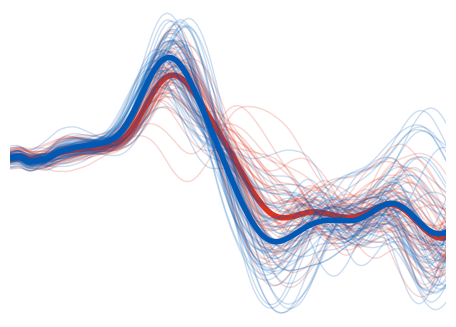

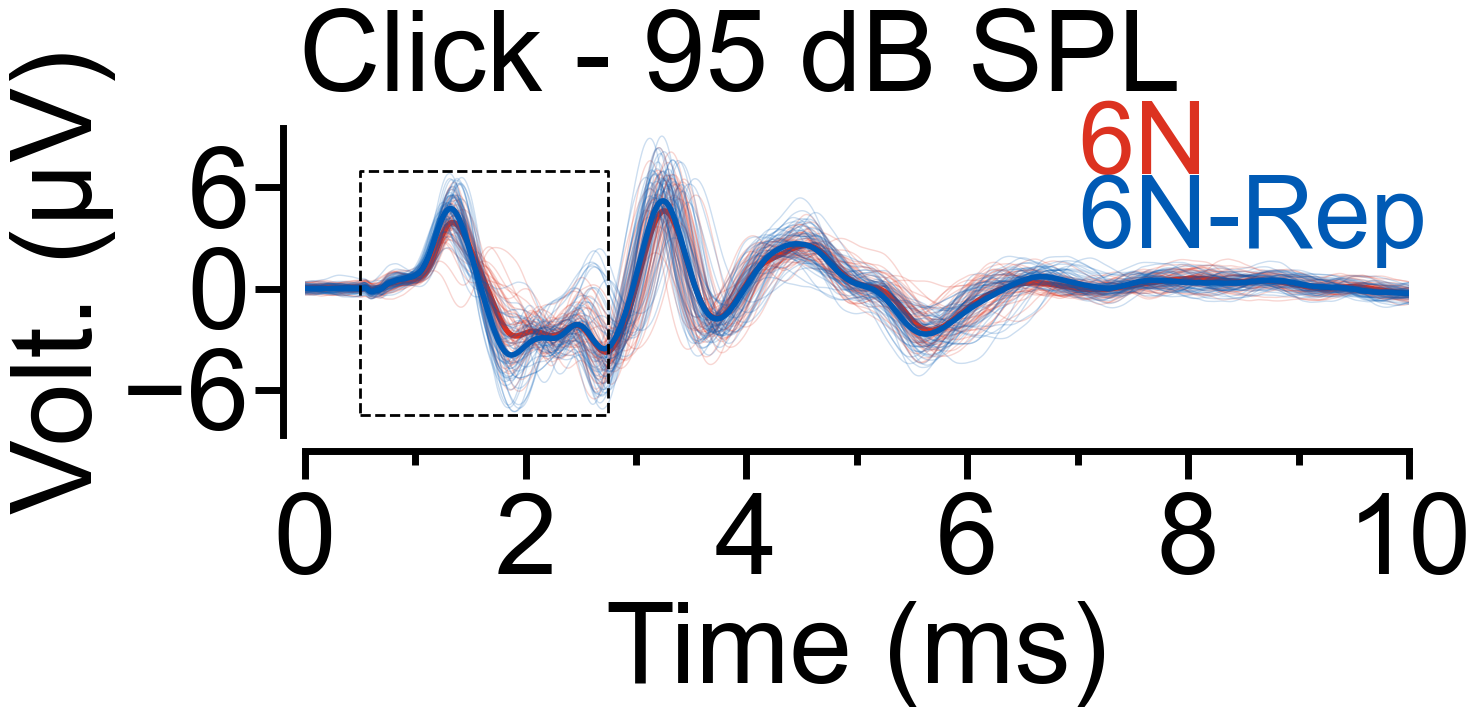

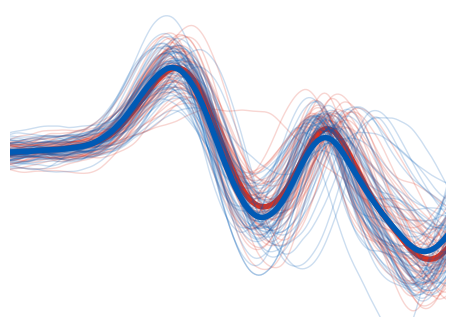

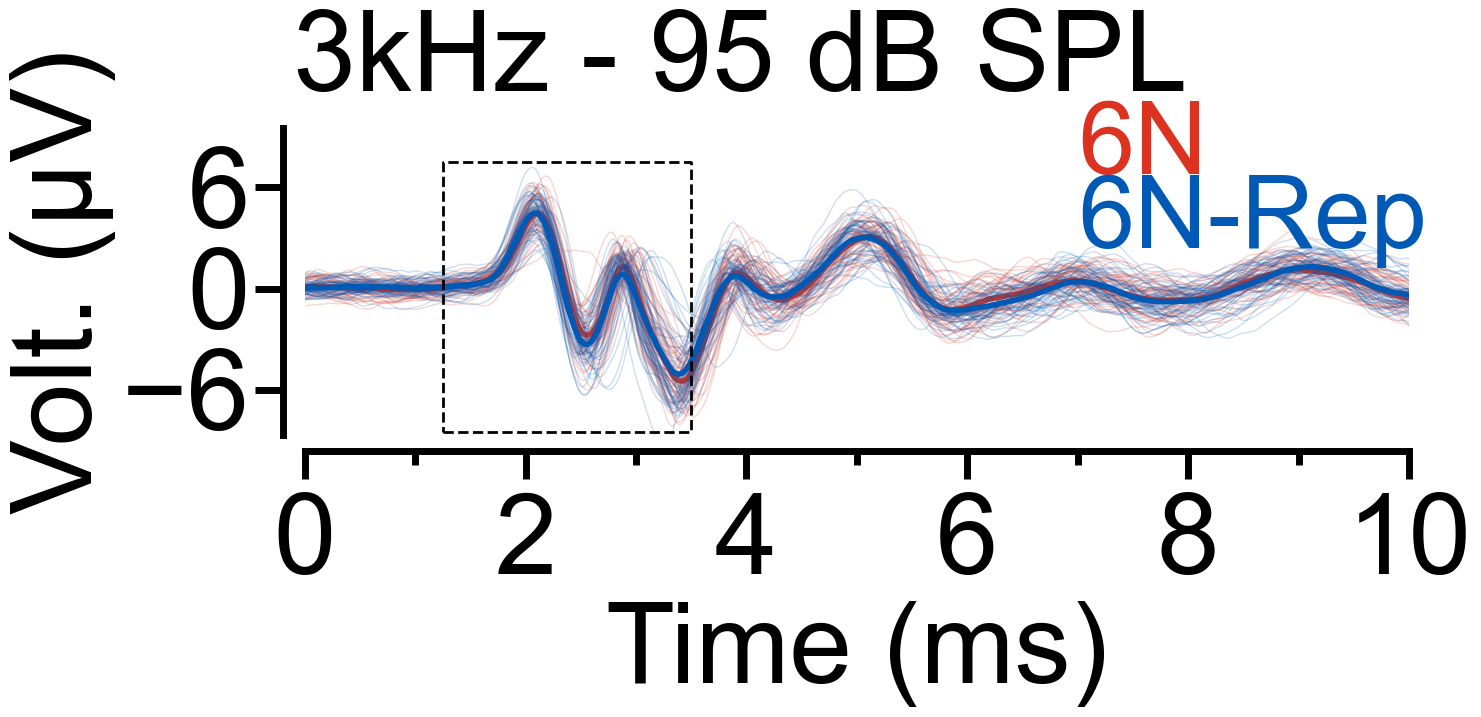

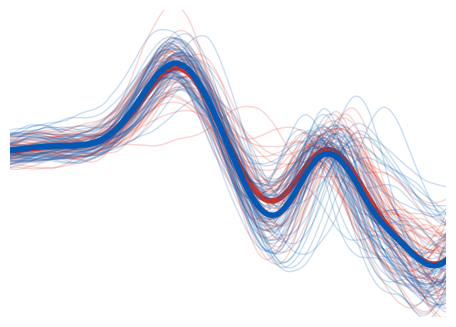

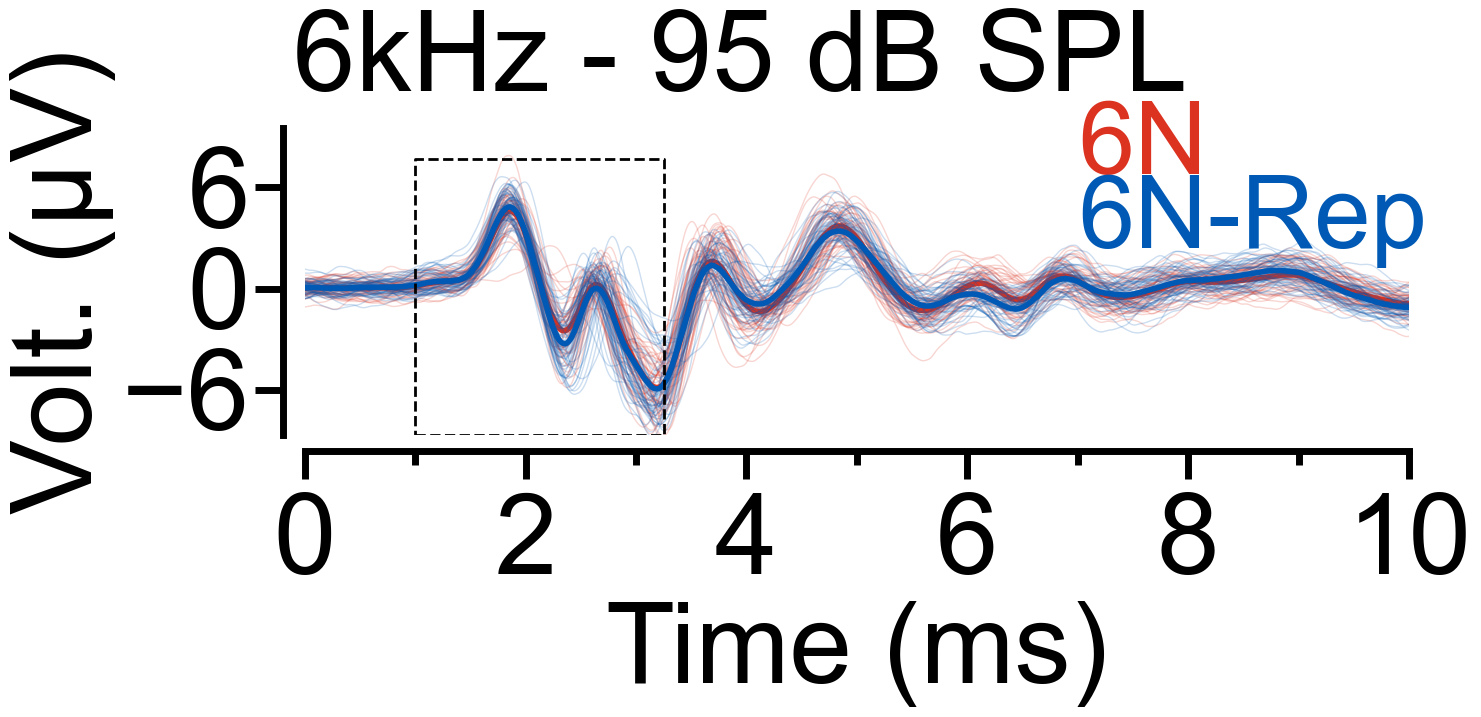

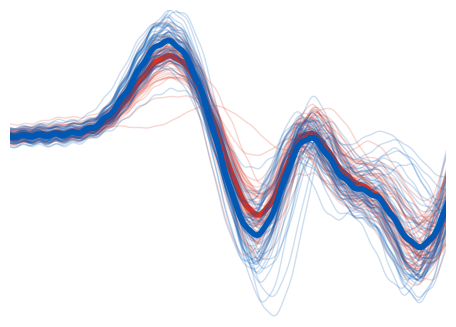

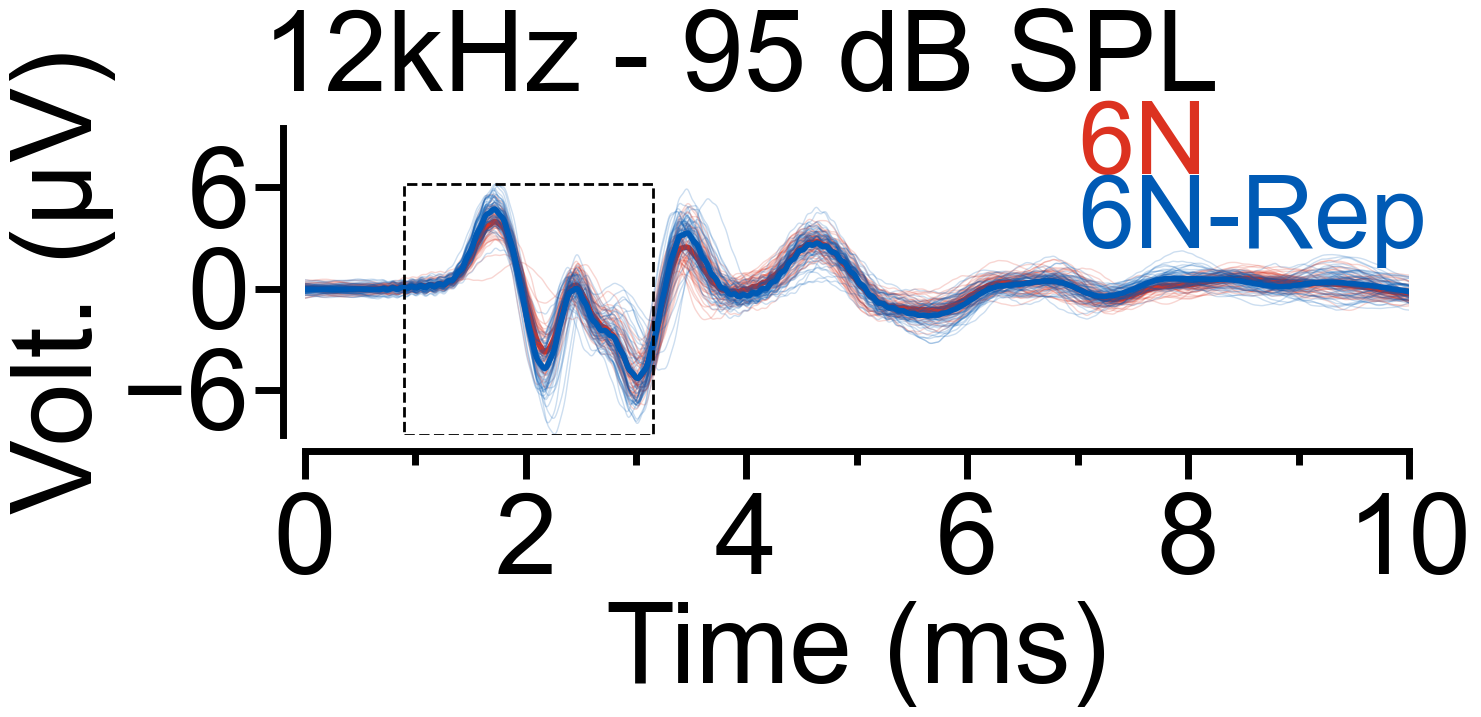

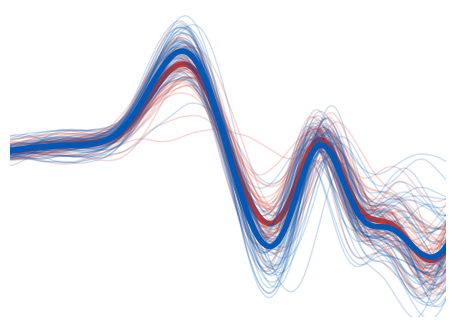

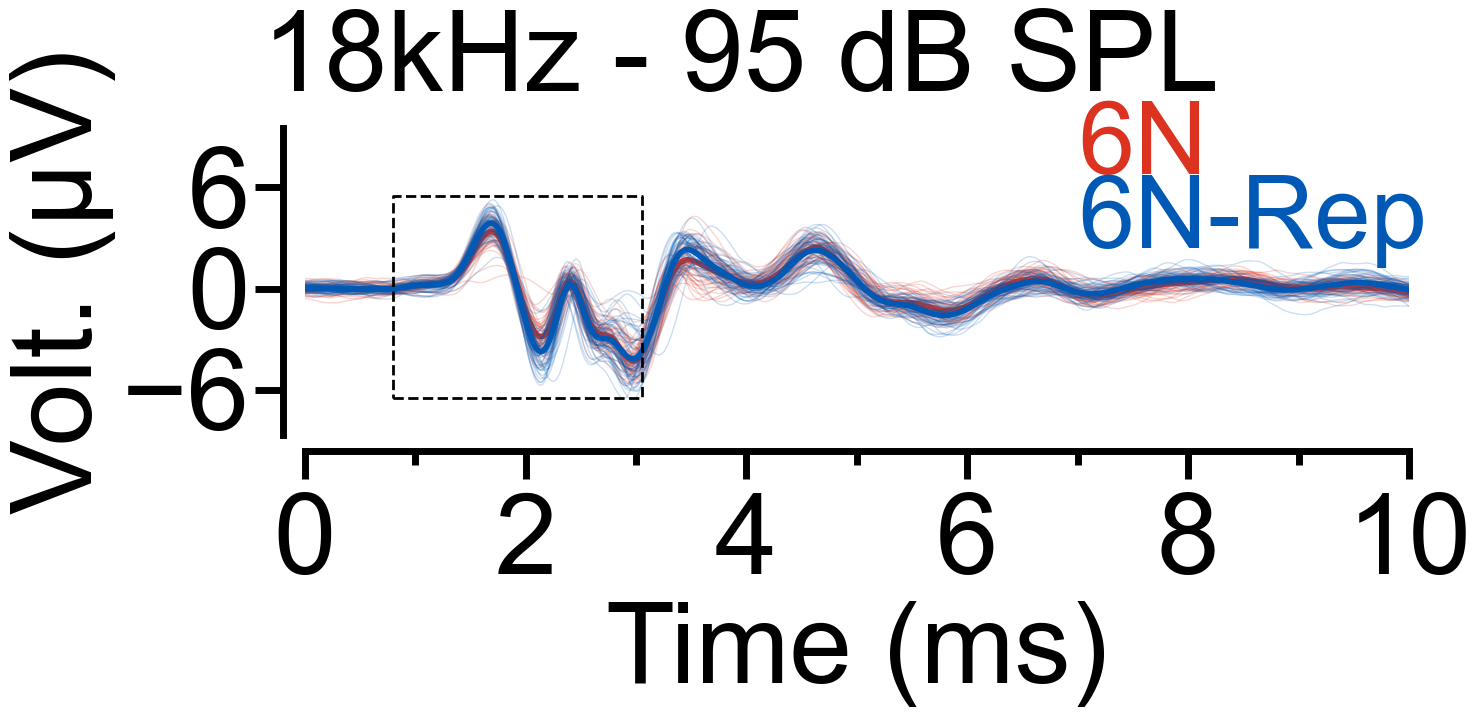

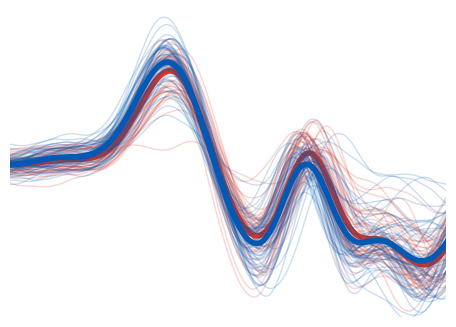

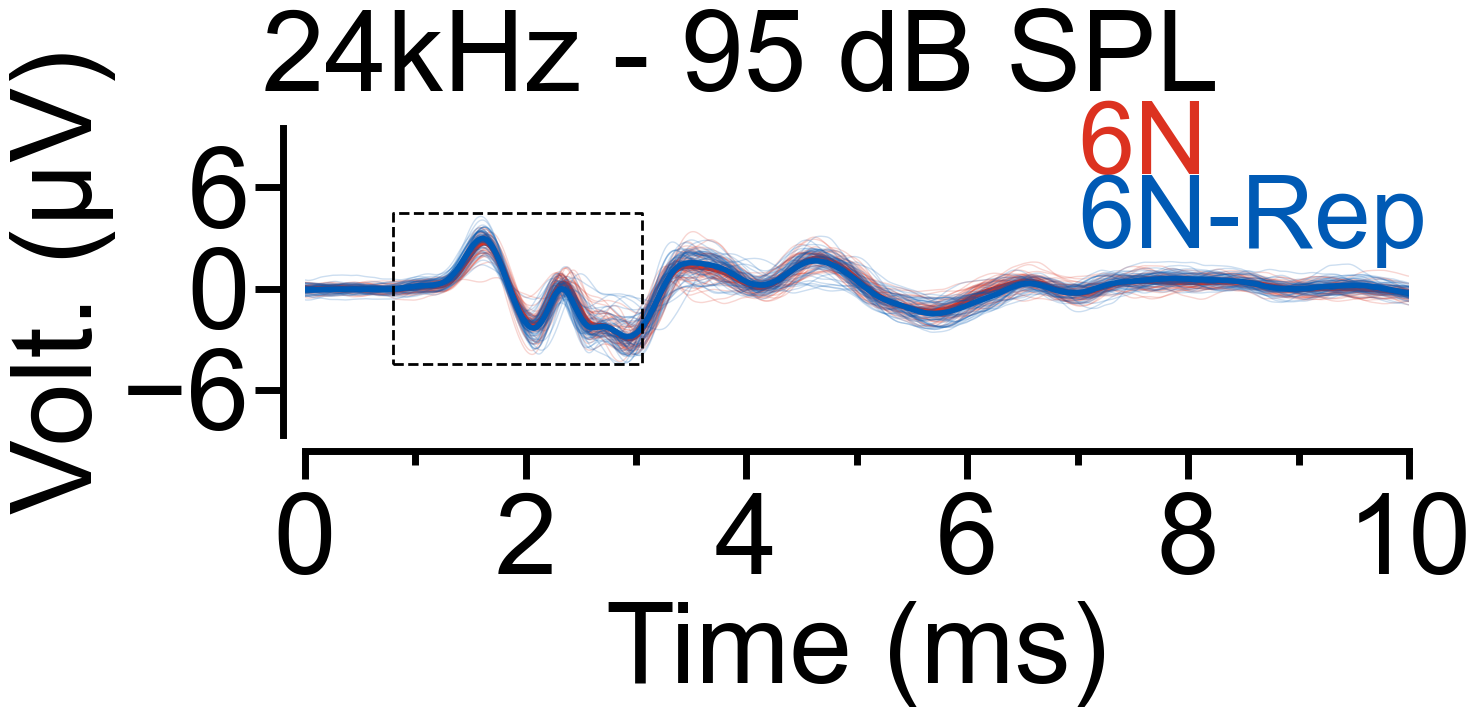

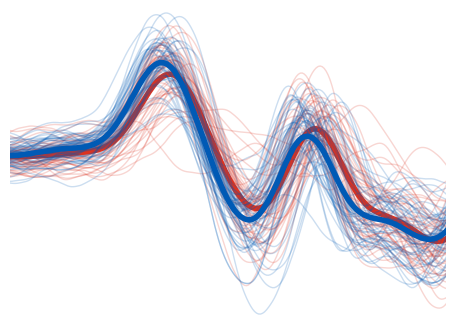

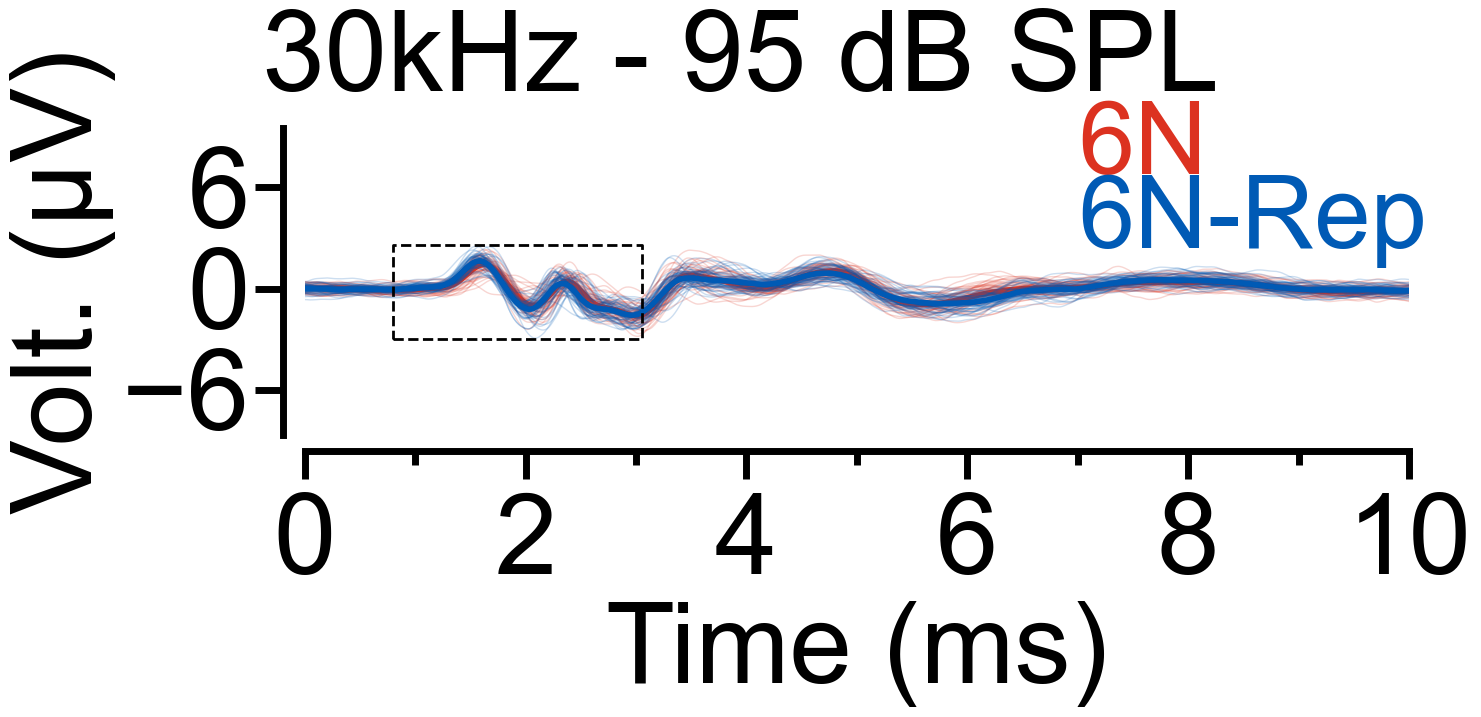

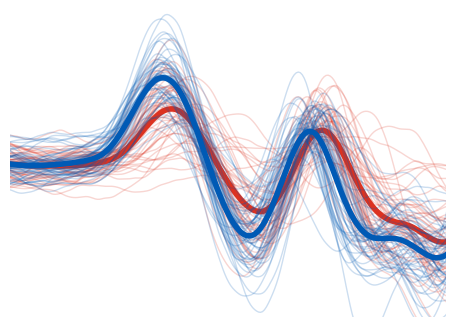

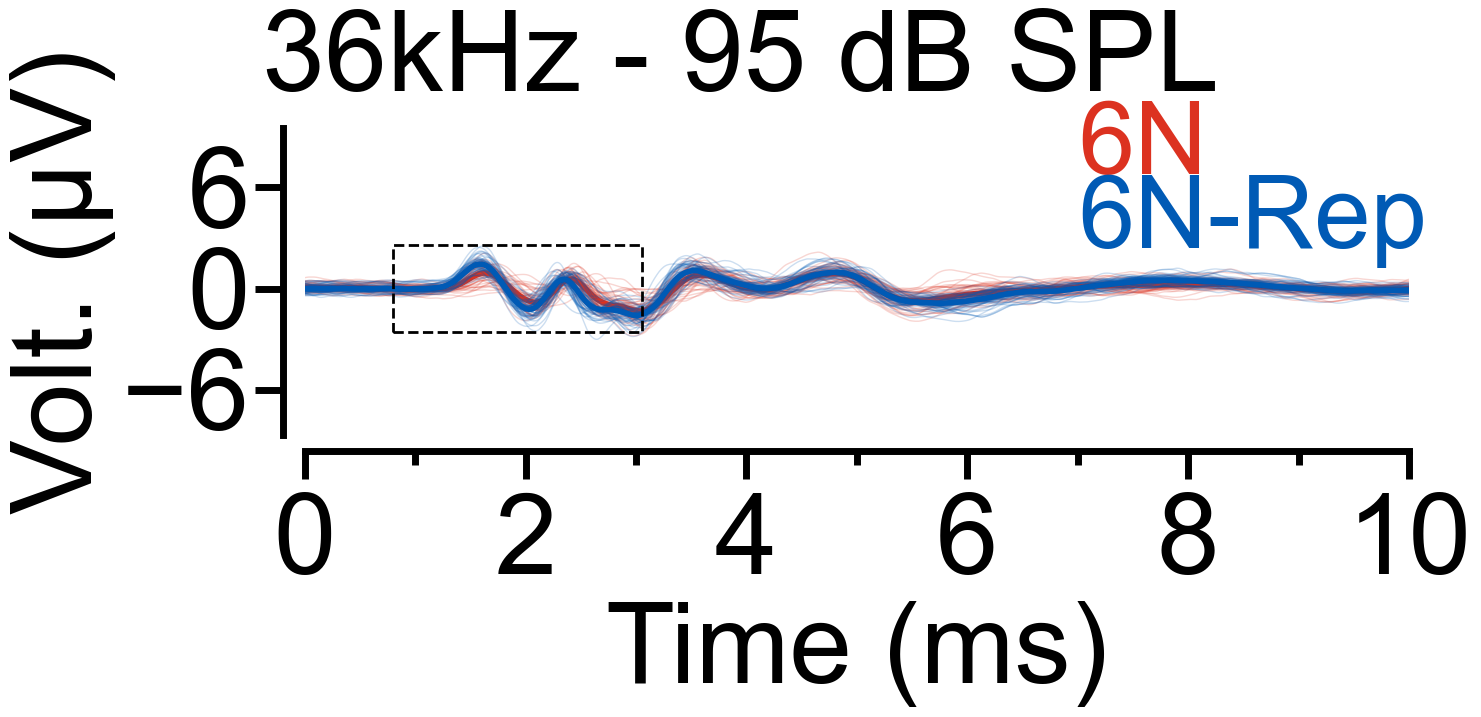

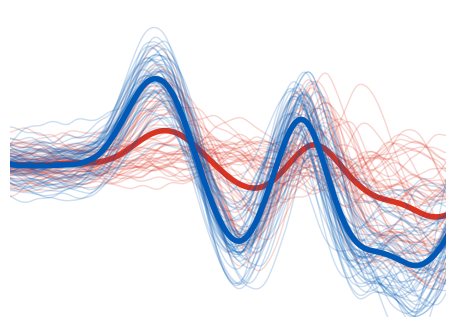

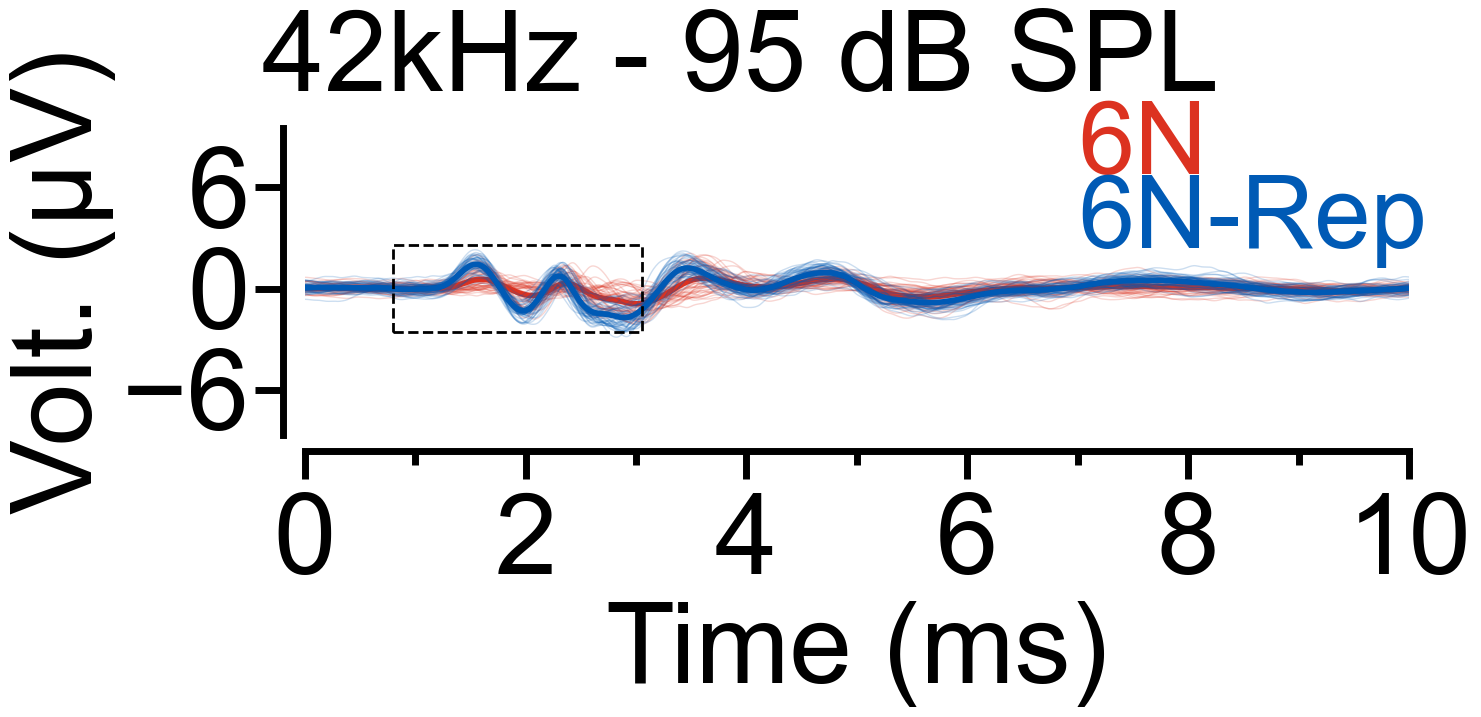

In [5]:
"""
This script generates and saves average and individual waveform figures for different frequencies at a specific sound pressure level (SPL). Some are in supplementary figure 3

"""

freqDict = {100:'Click',3000:'3kHz',6000:'6kHz',12000:'12kHz',18000:'18kHz',24000:'24kHz',30000:'30kHz',36000:'36kHz',42000:'42kHz'}

for freq in freqDict.keys():
    for dbSPL in [95]:

        if freq == 100:
            bbox = [0.5,2.75,-7.5,7]
        elif freq == 3000:
            bbox = [1.25,3.5,-8.5,7.5]
        elif freq == 6000:
            bbox = [1.,3.25,-8.7,7.7]
        elif freq == 12000:
            bbox = [0.9,3.15,-8.7,6.2]
        elif freq == 18000:
            bbox = [0.8,3.05,-6.5,5.5]
        elif freq == 24000:
            bbox = [0.8,3.05,-4.5,4.5]
        elif freq == 30000:
            bbox = [0.8,3.05,-3.,2.6]
        elif freq == 36000:
            bbox = [0.8,3.05,-2.6,2.6]
        elif freq == 42000:
            bbox = [0.8,3.05,-2.6,2.6]


        X_train,  X_test,y_train,y_test,dataVersion = at.createClassificationDataset(test_size=0.25,oversample=False,ages=[1,],frequencies=[freq],lowestInt=dbSPL,highestInt=dbSPL,datafolder='../../data')
        X_full_1month = np.vstack([X_train,X_test])
        y_full_1month = np.hstack([y_train,y_test])




        f = figure(figsize=(3.7*2.2,3.7*2))
        gs= gridspec.GridSpec(1,1,hspace=0,figure=f)
        ax = plt.subplot(gs[0])
        ax,f=waveformComparisonFigure(X_full_1month,y_full_1month,title='1 month',ax=ax,f=f,gs=gs)

        xticks([0.5,2.5])

        ax.xaxis.set_visible(False)
        ax.spines.bottom.set_visible(False)
        ax.yaxis.set_visible(False)
        ax.spines.left.set_visible(False)

        suptitle('')

        ylim(bbox[2],bbox[3])
        xlim(bbox[0],bbox[1])
        savefig(f'./Panels/waveform_1month_{freqDict[freq]}_{dbSPL}DBzoom.pdf',transparent=True,dpi=1200)


        ax,f=waveformComparisonFigure(X_full_1month,y_full_1month,title='1 month')

        ax.plot([bbox[0],bbox[1],bbox[1],bbox[0],bbox[0]],[bbox[2],bbox[2],bbox[3],bbox[3],bbox[2]],'--k',linewidth=2)


        ax.text(7,6.8,'6N',fontsize=fontSize*0.9,c='#DC3220')
        ax.text(7,2.4,'6N-Rep',fontsize=fontSize*0.9,c='#005AB5')
        ax.set_ylim(-8.72,9.52)
        ax.set_xlim(0,10)
        f.suptitle(f'{freqDict[freq]} - {dbSPL} dB SPL',fontsize=fontSize)
        savefig(f'./Panels/waveform_{freqDict[freq]}_1month_{dbSPL}DB.pdf',transparent=True,dpi=1200)


# Wave analysis

Generate master for wave i analysis

In [8]:
datafolder = '../../data/'
waveanalysisFolder = 'waveAnalysisResults'
sixN = pd.read_excel(os.path.join(datafolder,'6N - MachineLearningABR_MouseList.xlsx'))
rep = pd.read_excel(os.path.join(datafolder,'Repaired - MachineLearningABR_MouseList.xlsx'))

age = '1month'
masterAll = pd.DataFrame()
rows = []
for j,el in sixN.iterrows():
    filename = str(el['ID']) + ' - '+age+'.csv'
    fullpath = os.path.join(datafolder,waveanalysisFolder,filename)
    a = pd.read_csv(fullpath)
    a['Strain'] = '6N'
    a['Age'] = age
    a['ID'] = el['ID']
    rows.append(a)
#masterAll = masterAll.append(a)
    
for j,el in rep.iterrows():
    filename = str(el['ID']) + ' - '+age+'.csv'
    fullpath = os.path.join(datafolder,waveanalysisFolder,filename)
    a = pd.read_csv(fullpath)
    a['Strain'] = 'Repaired'
    a['Age'] = age
    a['ID'] = el['ID']
    rows.append(a)
masterAll = pd.concat(rows,ignore_index=True)

masterAll['Wave1 amp'] = masterAll['P1_y']-masterAll['N1_y']
masterAll['Wave1 latency'] = masterAll['P1_x']

In [9]:
def rand_jitter(arr):
    stdev = 0.5 #* (max(arr) - min(arr))
    return arr + np.random.randn(len(arr)) * stdev
def generateAmplitudeFigure(masterAll,age='1month',freq=100):
    """
    Generates a figure showing the amplitude of Wave 1 for different strains and intensities.
    Parameters:
    masterAll (DataFrame): The master DataFrame containing the data.
    age (str, optional): The age to filter the data by. Default is '1month'.
    freq (int, optional): The frequency to filter the data by. Default is 100.
    Returns:
    Figure: The generated figure.
    """
    master = masterAll.query("Age == @age & Freq==@freq")
    avg = master.groupby(['Strain','Intensity'])[['Wave1 amp','Wave1 latency']].agg([mean,std]).reset_index()
    lat6n = avg[avg['Strain']=='6N']['Wave1 amp']
    latrep = avg[avg['Strain']=='Repaired']['Wave1 amp']
    x = avg[avg['Strain']=='6N']['Intensity']
    xrep = avg[avg['Strain']=='Repaired']['Intensity']

    df6N = master.query("Strain=='6N'").groupby(['ID','Intensity'])[['Wave1 amp']].mean().reset_index()[['ID','Intensity','Wave1 amp']].pivot(columns='Intensity',index='ID')
    dfRep = master.query("Strain=='Repaired'").groupby(['ID','Intensity'])[['Wave1 amp']].mean().reset_index()[['ID','Intensity','Wave1 amp']].pivot(columns='Intensity',index='ID')

    f= figure(figsize=(20.484616989,14))

    gs= gridspec.GridSpec(1, 1,figure=f)

    ax = plt.subplot(gs[0])

    errorbar(x,lat6n['mean'],lat6n['std'],fmt='o',color = '#DC3220', markersize=markersize,clip_on=False,capsize=10,linewidth=3,capthick=3)
    plot(x[:],lat6n['mean'],'-',color='#DC3220',linewidth=3)
    plot(x[:],df6N.values.T,color='#DC3220',linewidth=2,alpha=0.2)

    errorbar(xrep,latrep['mean'],latrep['std'],fmt='o',c='#005AB5',markersize=markersize,clip_on=False,capsize=10,linewidth=3,capthick=3)
    plot(xrep[:],latrep['mean'],'-',c='#005AB5',linewidth=3)
    plot(xrep[:],dfRep.values.T,color='#005AB5',linewidth=2,alpha=0.2)

    ax.spines.right.set_visible(False)
    ax.spines.top.set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    ax.spines['left'].set_position(('axes', -0.025))
    ax.spines['bottom'].set_position(('axes', -0.00))
    ax.set_ylim(0,15)
    ax.set_xlim(20,100)

    xlabel('Sound intensity (dB SPL)',fontsize = fontSize)
    ylabel('Wave 1 amplitude (μV)', fontsize = fontSize*0.98)
    text(30,10,'6N ',fontsize=fontSize,c='#DC3220')
    text(30,8.5,'6N-Rep',fontsize=fontSize,c='#005AB5')
        


    xticks(arange(20,110,10),fontsize=fontSize)
    yticks(arange(0,16,2), fontsize = fontSize)
    gs.tight_layout(f)
    return f


def generateIntensityFigure(masterAll,age='1month',freq=100):
    """
    Generates a figure showing the intensity of Wave 1 latency for different strains.
    Parameters:
    masterAll (pd.DataFrame): DataFrame containing the master data with columns 'Age', 'Freq', 'Strain', 'Intensity', 'Wave1 amp', and 'Wave1 latency'.
    age (str): The age group to filter the data by. Default is '1month'.
    freq (int): The frequency to filter the data by. Default is 100.
    Returns:
    matplotlib.figure.Figure: The generated figure.
    """
    
    master = masterAll.query("Age == @age & Freq==@freq")
    avg = master.groupby(['Strain','Intensity'])[['Wave1 amp','Wave1 latency']].agg([mean,std]).reset_index()
    lat6n = avg[avg['Strain']=='6N']['Wave1 latency']
    latrep = avg[avg['Strain']=='Repaired']['Wave1 latency']
    x = avg[avg['Strain']=='6N']['Intensity']
    xrep = avg[avg['Strain']=='Repaired']['Intensity']

    df6N = master.query("Strain=='6N'").groupby(['ID','Intensity'])[['Wave1 latency']].mean().reset_index().pivot(columns='Intensity',index='ID')
    dfRep = master.query("Strain=='Repaired'").groupby(['ID','Intensity'])[['Wave1 latency']].mean().reset_index().pivot(columns='Intensity',index='ID')


    f= figure(figsize=(20.484616989,14))

    gs= gridspec.GridSpec(1, 1,figure=f)

    ax = plt.subplot(gs[0])
    errorbar(x,lat6n['mean'],lat6n['std'],fmt='o',color = '#DC3220', markersize=markersize,clip_on=False,capsize=10,linewidth=3,capthick=3)
    plot(x[:],lat6n['mean'],'-',color='#DC3220',linewidth=3)
    plot(x[:],df6N.values.T,color='#DC3220',linewidth=2,alpha=0.2)

    errorbar(xrep,latrep['mean'],latrep['std'],fmt='o',c='#005AB5',markersize=markersize,clip_on=False,capsize=10,linewidth=3,capthick=3)
    plot(xrep[:],latrep['mean'],'-',c='#005AB5',linewidth=3)
    plot(xrep[:],dfRep.values.T,color='#005AB5',linewidth=2,alpha=0.2)

    ax.spines.right.set_visible(False)
    ax.spines.top.set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    ax.spines['left'].set_position(('axes', -0.025))
    ax.spines['bottom'].set_position(('axes', -0.00))
    ax.set_ylim(1,2.6)
    ax.set_xlim(20,100)
    xlabel('Sound intensity (dB SPL)',fontsize = fontSize)
    ylabel('Wave 1 latency (ms)', fontsize = fontSize)

    text(30,1.45-0.25,'6N ',fontsize=fontSize,c='#DC3220')
    text(30,1.29-0.25,'6N-Rep',fontsize=fontSize,c='#005AB5')
        


    xticks(arange(20,110,10),fontsize=fontSize)
    yticks(arange(1,2.8,0.2), fontsize = fontSize)
    gs.tight_layout(f)
    return f

/var/folders/n2/bkzw0ff907zgpgprdz_rg_tr0000gn/T/ipykernel_99884/3162518485.py:15: FutureWarning: The provided callable <function mean at 0x1045d16c0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  avg = master.groupby(['Strain','Intensity'])[['Wave1 amp','Wave1 latency']].agg([mean,std]).reset_index()
/var/folders/n2/bkzw0ff907zgpgprdz_rg_tr0000gn/T/ipykernel_99884/3162518485.py:15: FutureWarning: The provided callable <function std at 0x1045d17e0> is currently using SeriesGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.
  avg = master.groupby(['Strain','Intensity'])[['Wave1 amp','Wave1 latency']].agg([mean,std]).reset_index()
/var/folders/n2/bkzw0ff907zgpgprdz_rg_tr0000gn/T/ipykernel_99884/3162518485.py:15: FutureWarning: The provided callable <function mean at 0x1

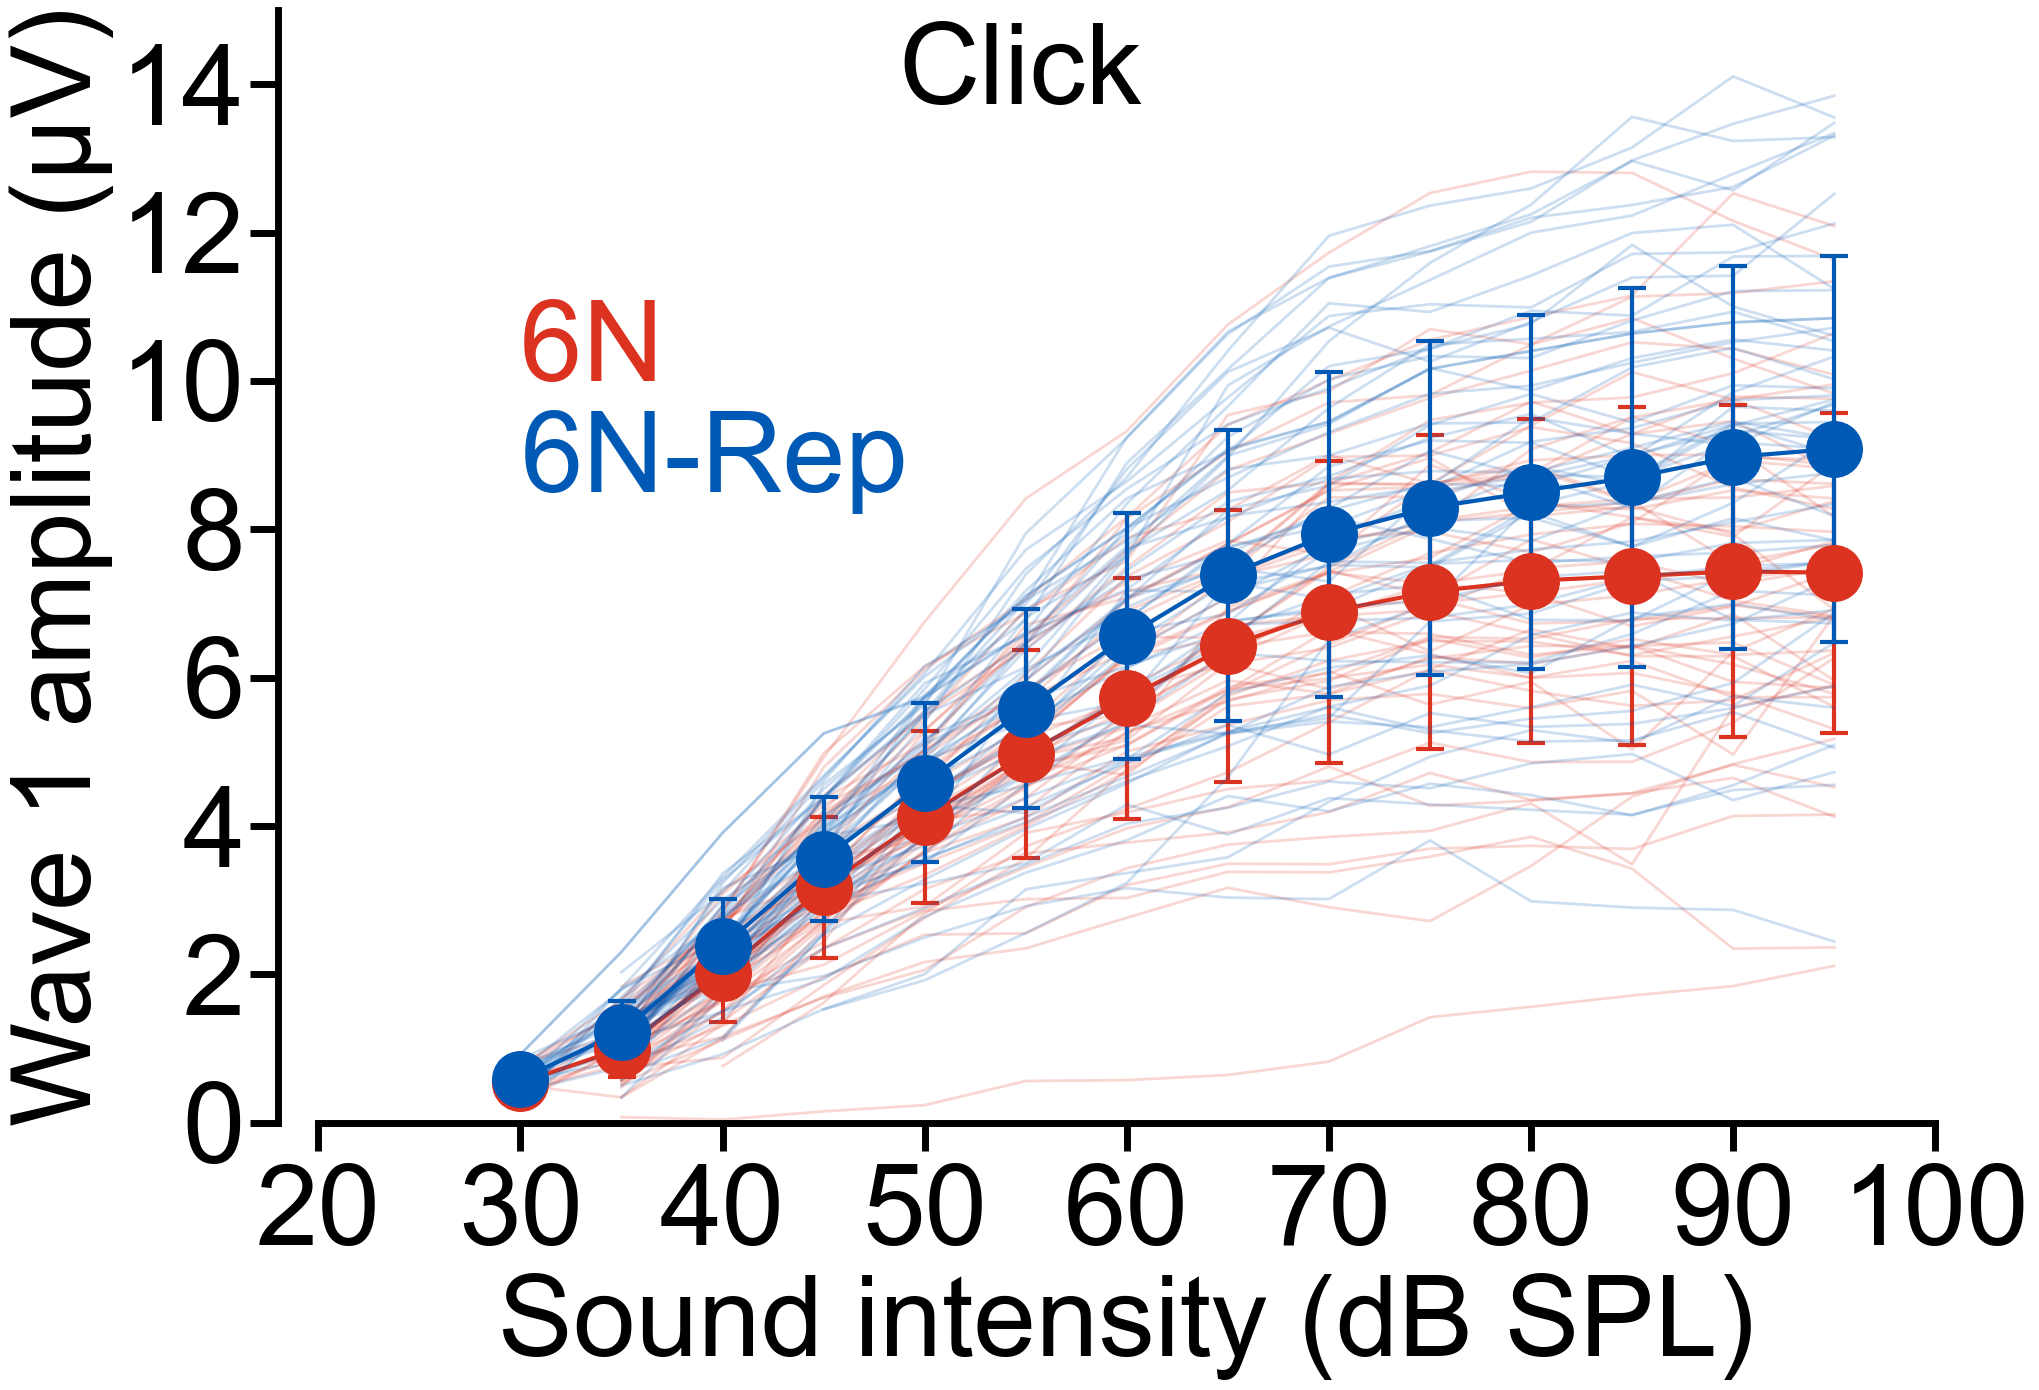

In [10]:
f = generateAmplitudeFigure(masterAll,freq=100,age='1month')
f.suptitle('Click',fontsize=fontSize)
savefig('./Panels/wave1amp.pdf',transparent=True,dpi=1200)

/var/folders/n2/bkzw0ff907zgpgprdz_rg_tr0000gn/T/ipykernel_99884/3162518485.py:72: FutureWarning: The provided callable <function mean at 0x1045d16c0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  avg = master.groupby(['Strain','Intensity'])[['Wave1 amp','Wave1 latency']].agg([mean,std]).reset_index()
/var/folders/n2/bkzw0ff907zgpgprdz_rg_tr0000gn/T/ipykernel_99884/3162518485.py:72: FutureWarning: The provided callable <function std at 0x1045d17e0> is currently using SeriesGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.
  avg = master.groupby(['Strain','Intensity'])[['Wave1 amp','Wave1 latency']].agg([mean,std]).reset_index()
/var/folders/n2/bkzw0ff907zgpgprdz_rg_tr0000gn/T/ipykernel_99884/3162518485.py:72: FutureWarning: The provided callable <function mean at 0x1

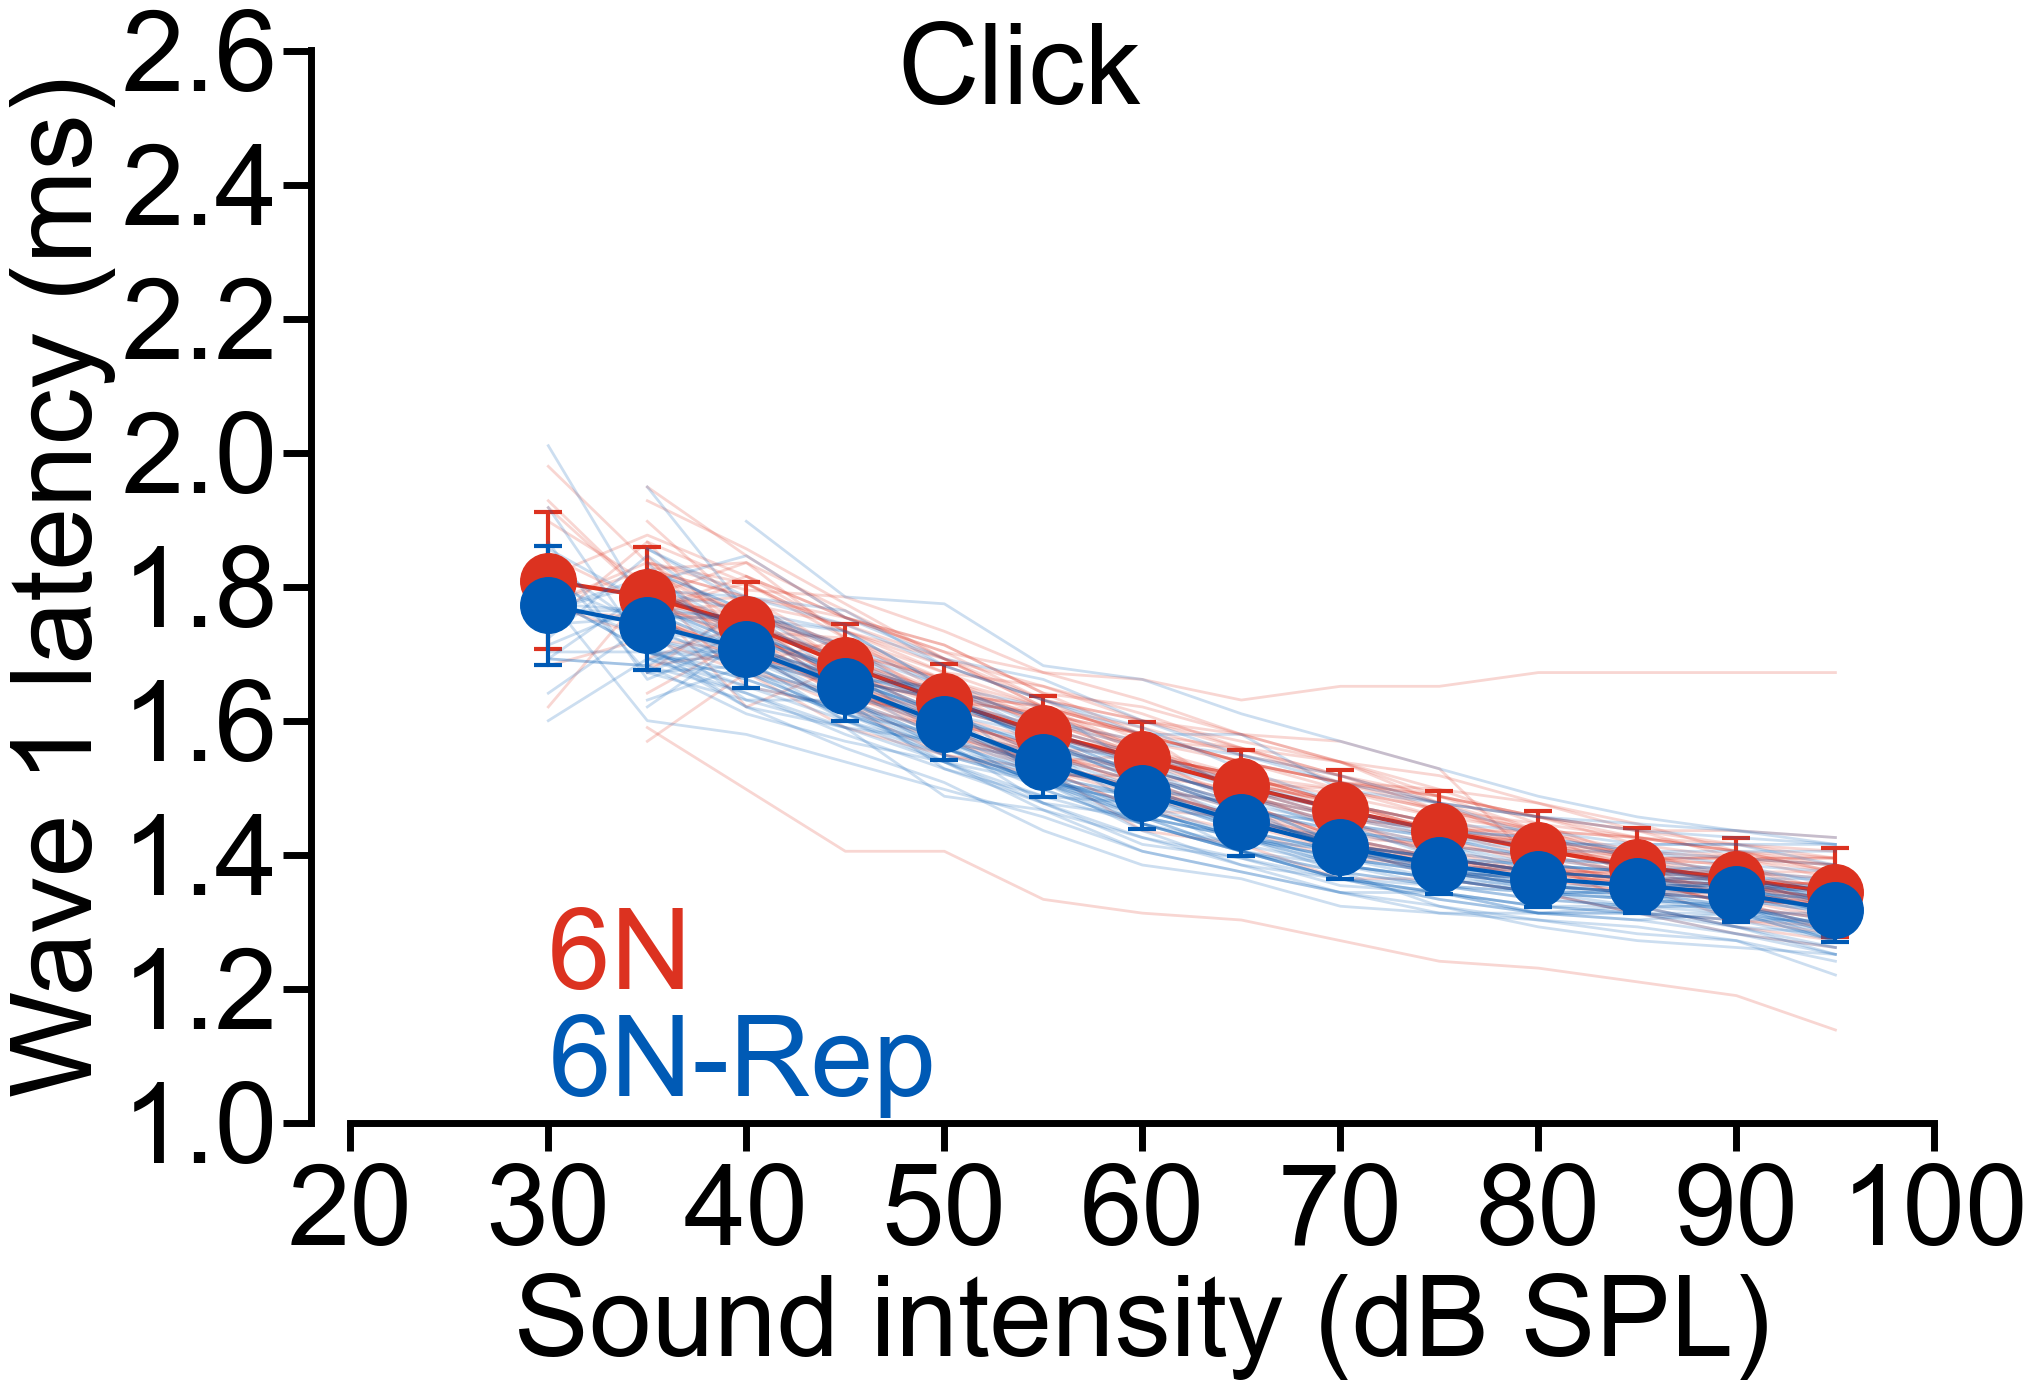

In [11]:
f=generateIntensityFigure(masterAll,freq=100,age='1month')
f.suptitle('Click',fontsize=fontSize)

savefig('./Panels/wave1lat.pdf',transparent=True,dpi=1200)

/var/folders/n2/bkzw0ff907zgpgprdz_rg_tr0000gn/T/ipykernel_99884/3162518485.py:15: FutureWarning: The provided callable <function mean at 0x1045d16c0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  avg = master.groupby(['Strain','Intensity'])[['Wave1 amp','Wave1 latency']].agg([mean,std]).reset_index()
/var/folders/n2/bkzw0ff907zgpgprdz_rg_tr0000gn/T/ipykernel_99884/3162518485.py:15: FutureWarning: The provided callable <function std at 0x1045d17e0> is currently using SeriesGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.
  avg = master.groupby(['Strain','Intensity'])[['Wave1 amp','Wave1 latency']].agg([mean,std]).reset_index()
/var/folders/n2/bkzw0ff907zgpgprdz_rg_tr0000gn/T/ipykernel_99884/3162518485.py:15: FutureWarning: The provided callable <function mean at 0x1

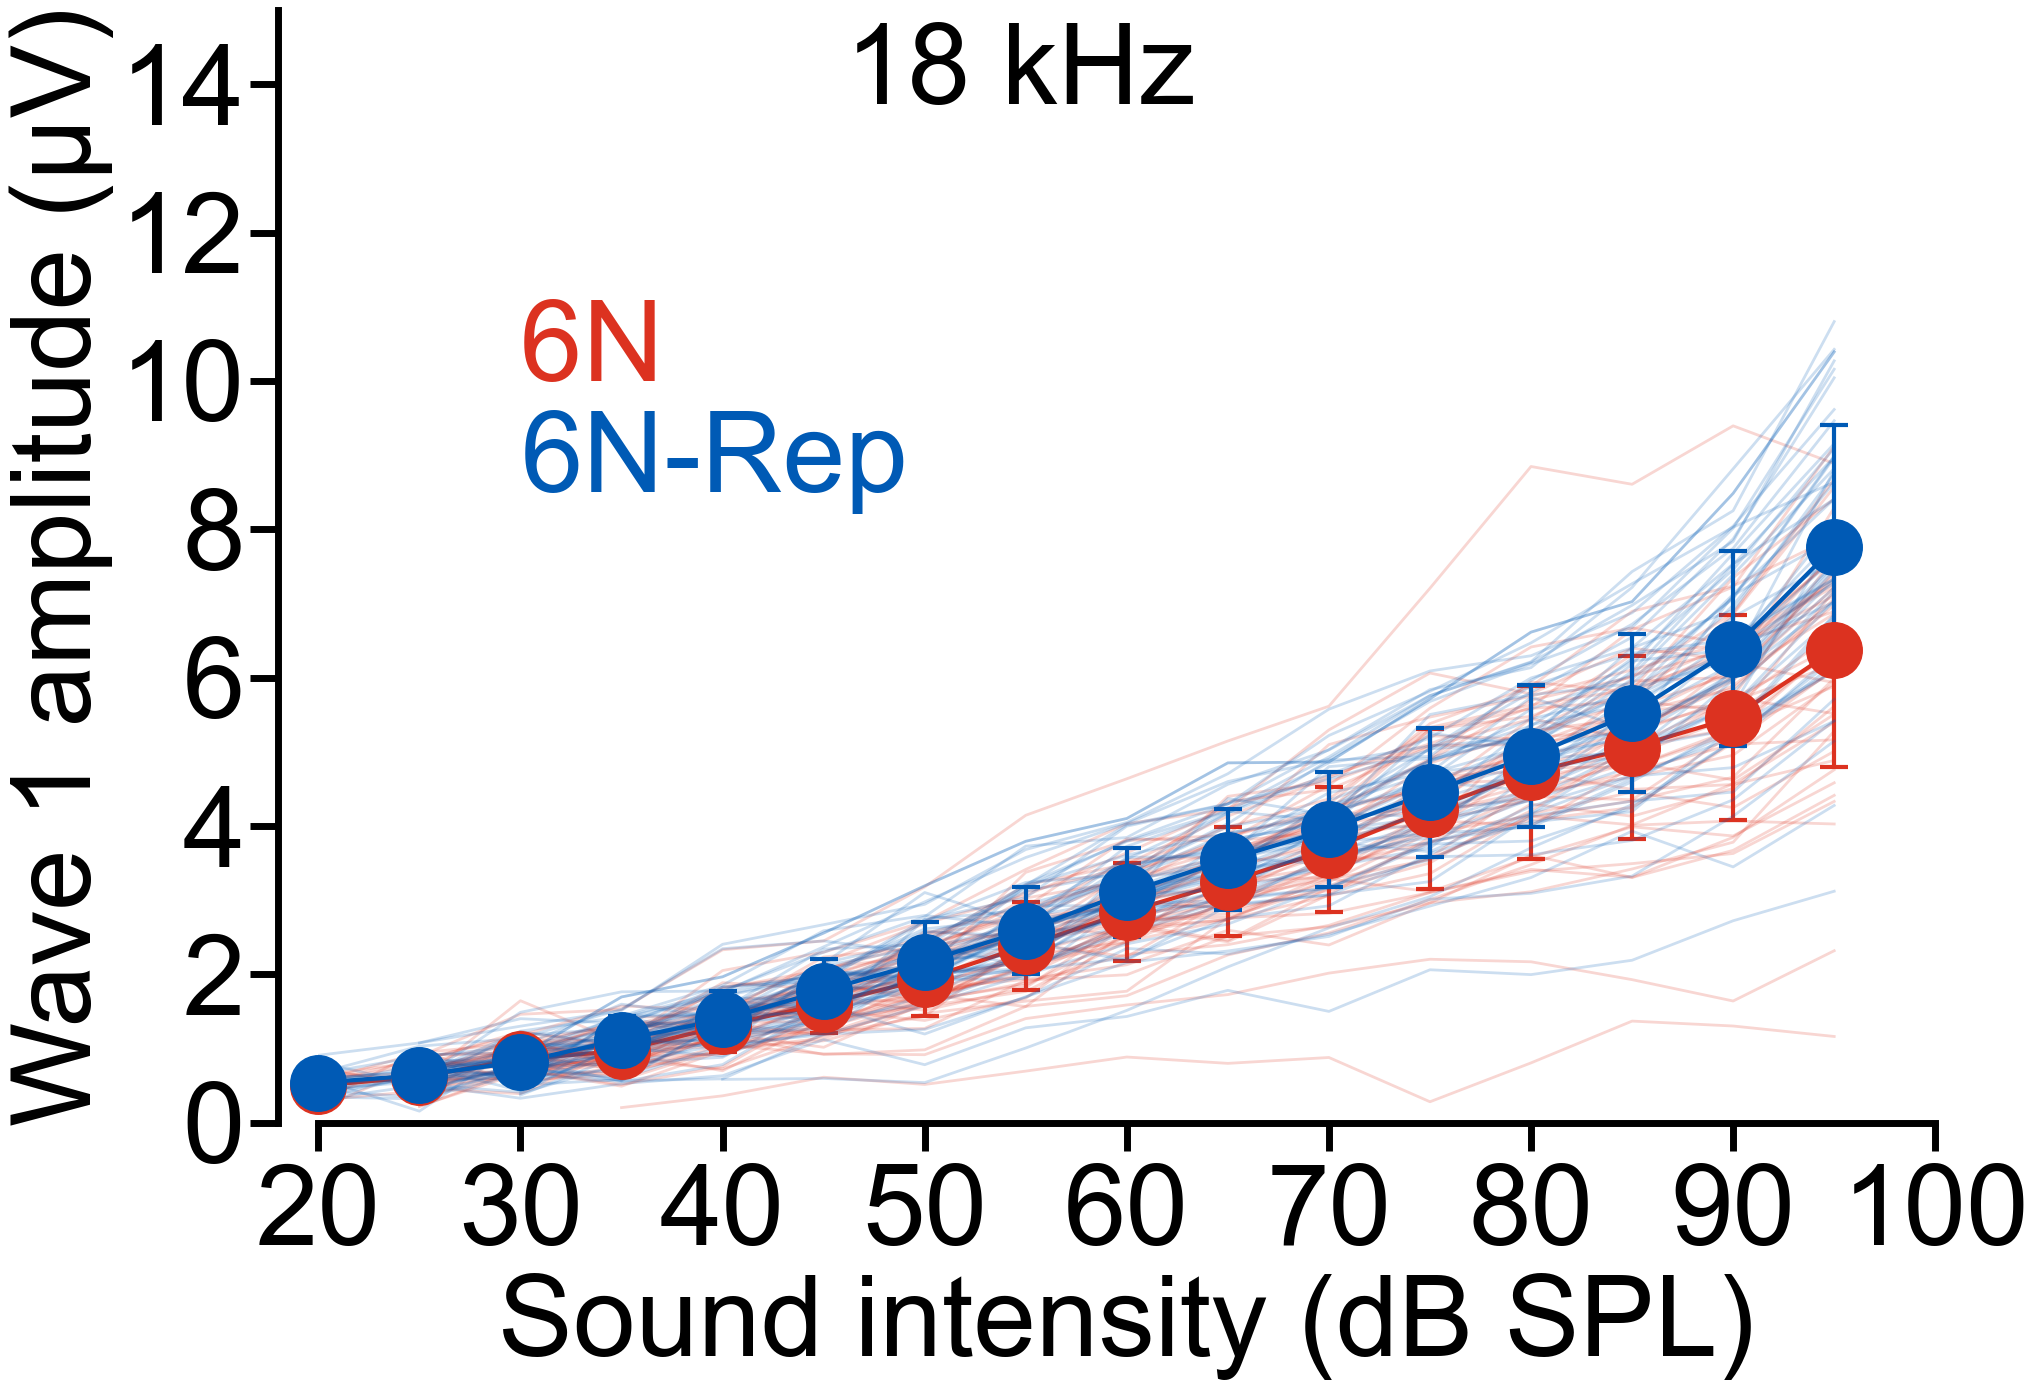

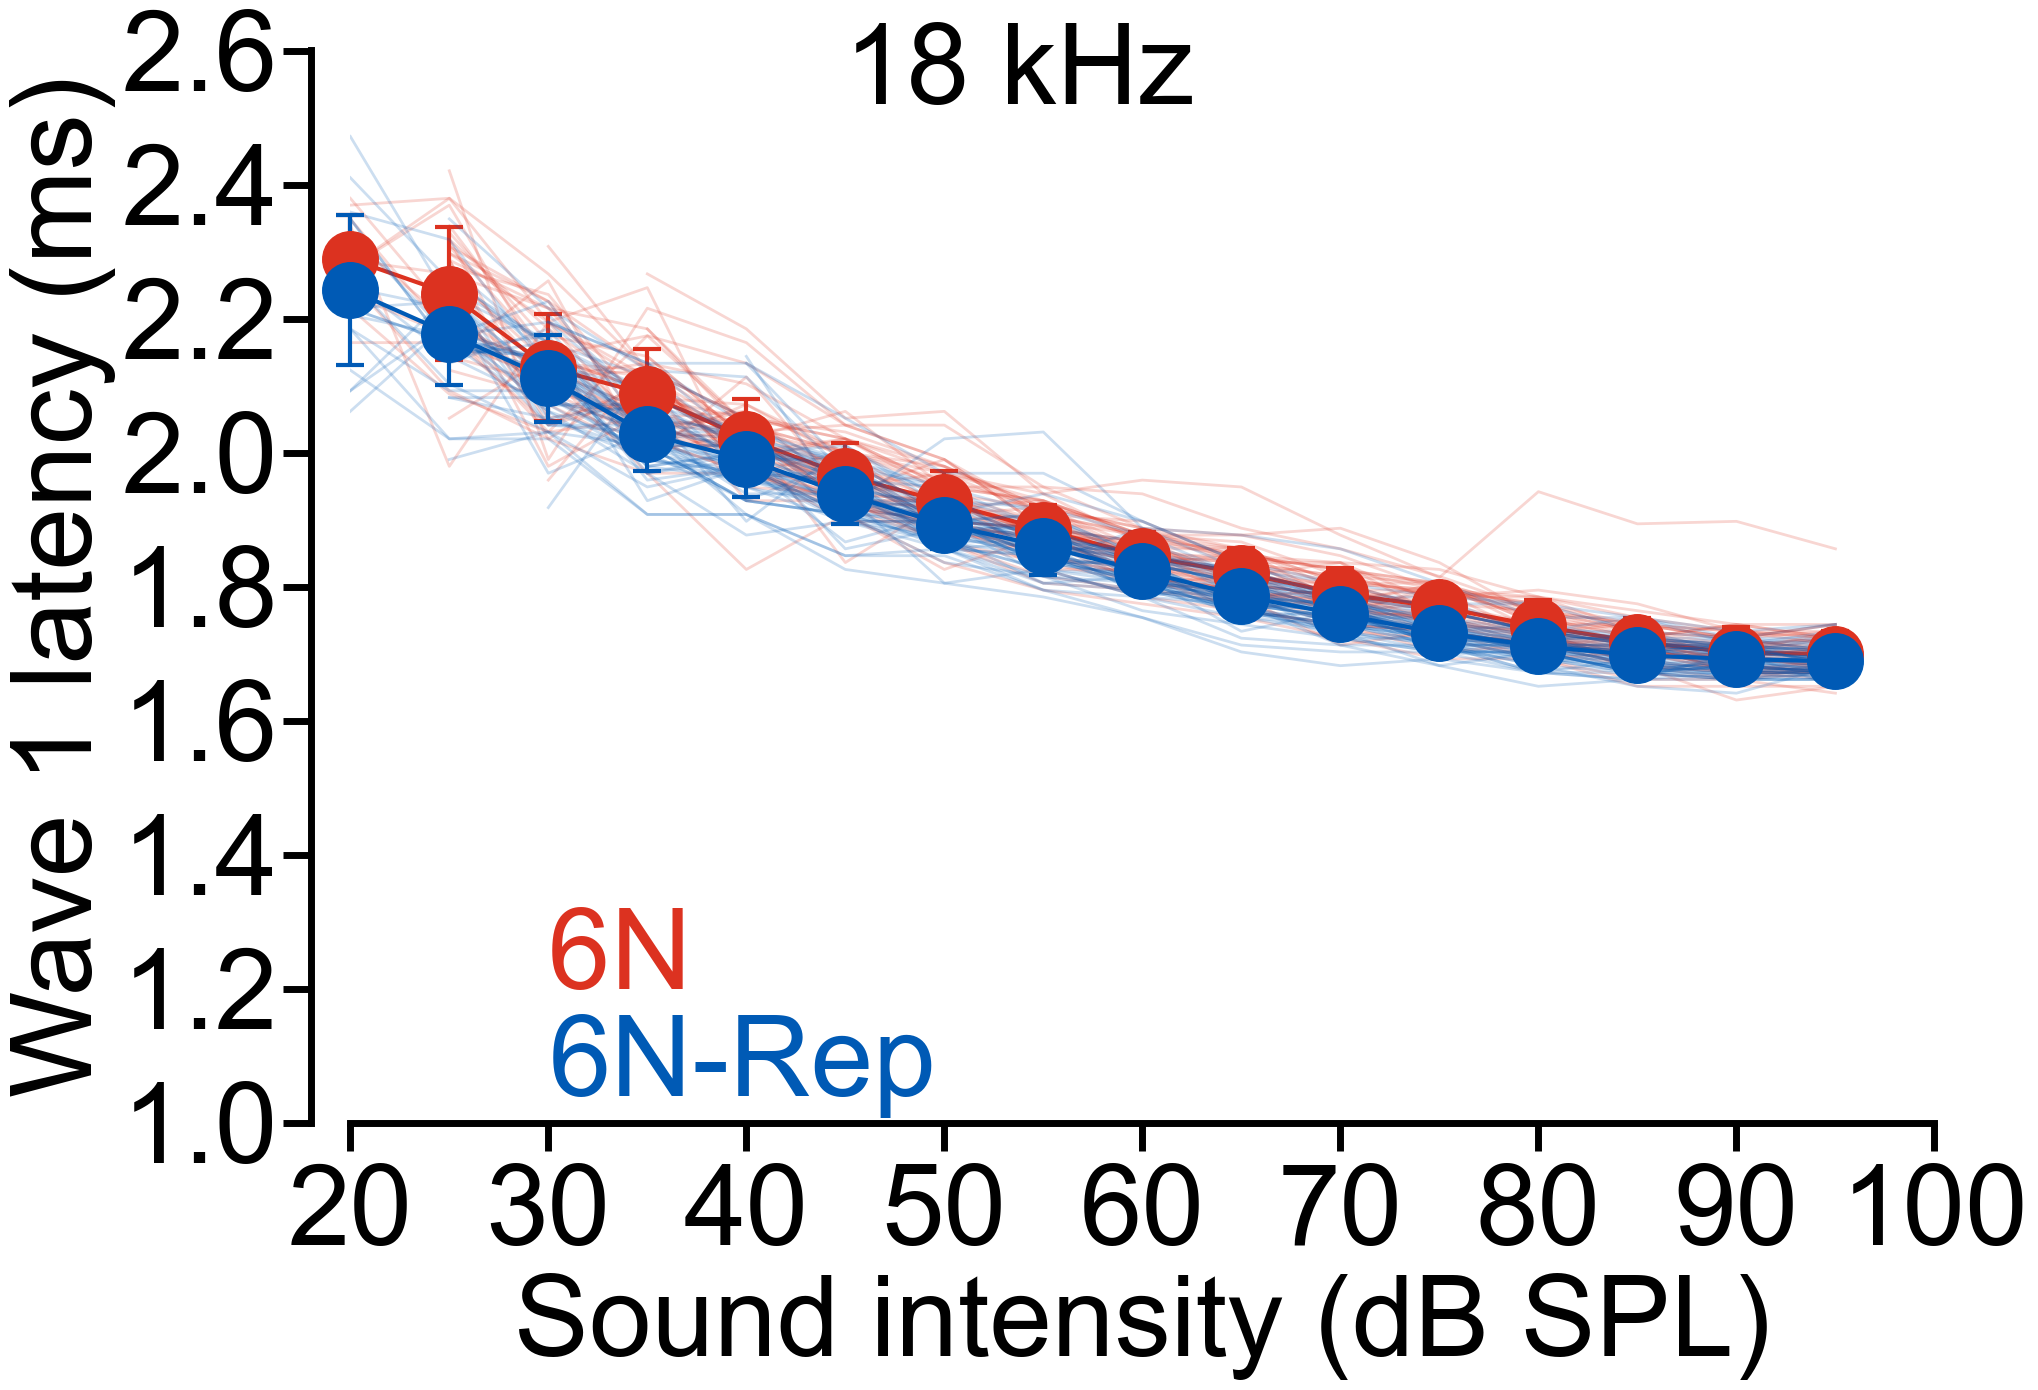

In [12]:
f = generateAmplitudeFigure(masterAll,freq=18000,age='1month')
f.suptitle('18 kHz',fontsize=fontSize)
savefig('./Panels/wave1amp18kHz.pdf',transparent=True,dpi=1200)

f = generateIntensityFigure(masterAll,freq=18000,age='1month')
f.suptitle('18 kHz',fontsize=fontSize)
savefig('./Panels/wave1lat18kHz.pdf',transparent=True,dpi=1200)

/var/folders/n2/bkzw0ff907zgpgprdz_rg_tr0000gn/T/ipykernel_99884/3162518485.py:15: FutureWarning: The provided callable <function mean at 0x1045d16c0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  avg = master.groupby(['Strain','Intensity'])[['Wave1 amp','Wave1 latency']].agg([mean,std]).reset_index()
/var/folders/n2/bkzw0ff907zgpgprdz_rg_tr0000gn/T/ipykernel_99884/3162518485.py:15: FutureWarning: The provided callable <function std at 0x1045d17e0> is currently using SeriesGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.
  avg = master.groupby(['Strain','Intensity'])[['Wave1 amp','Wave1 latency']].agg([mean,std]).reset_index()
/var/folders/n2/bkzw0ff907zgpgprdz_rg_tr0000gn/T/ipykernel_99884/3162518485.py:15: FutureWarning: The provided callable <function mean at 0x1

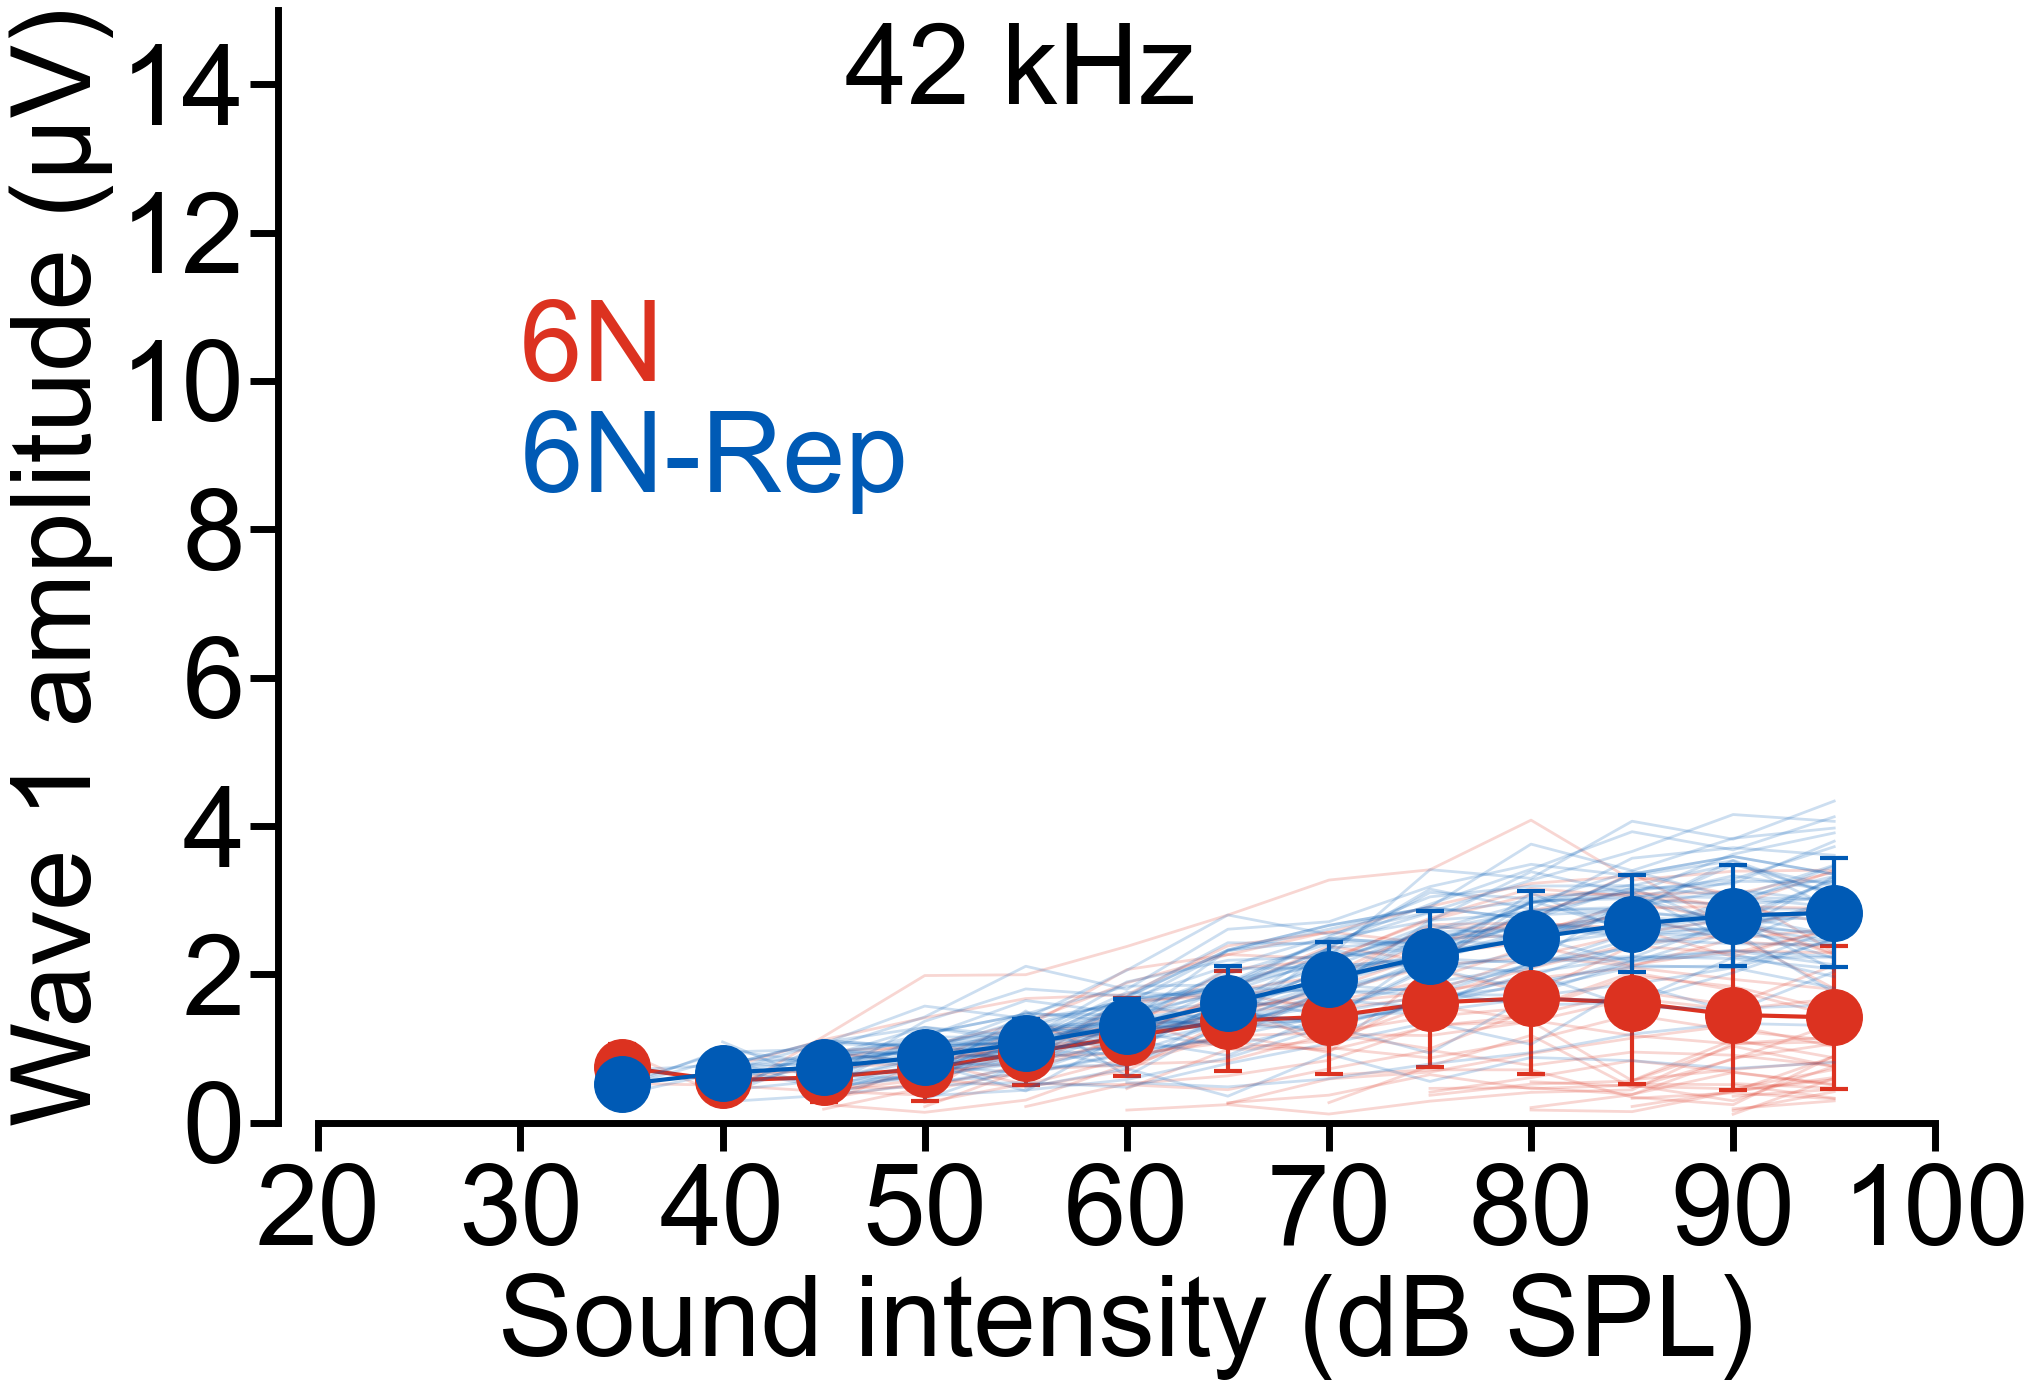

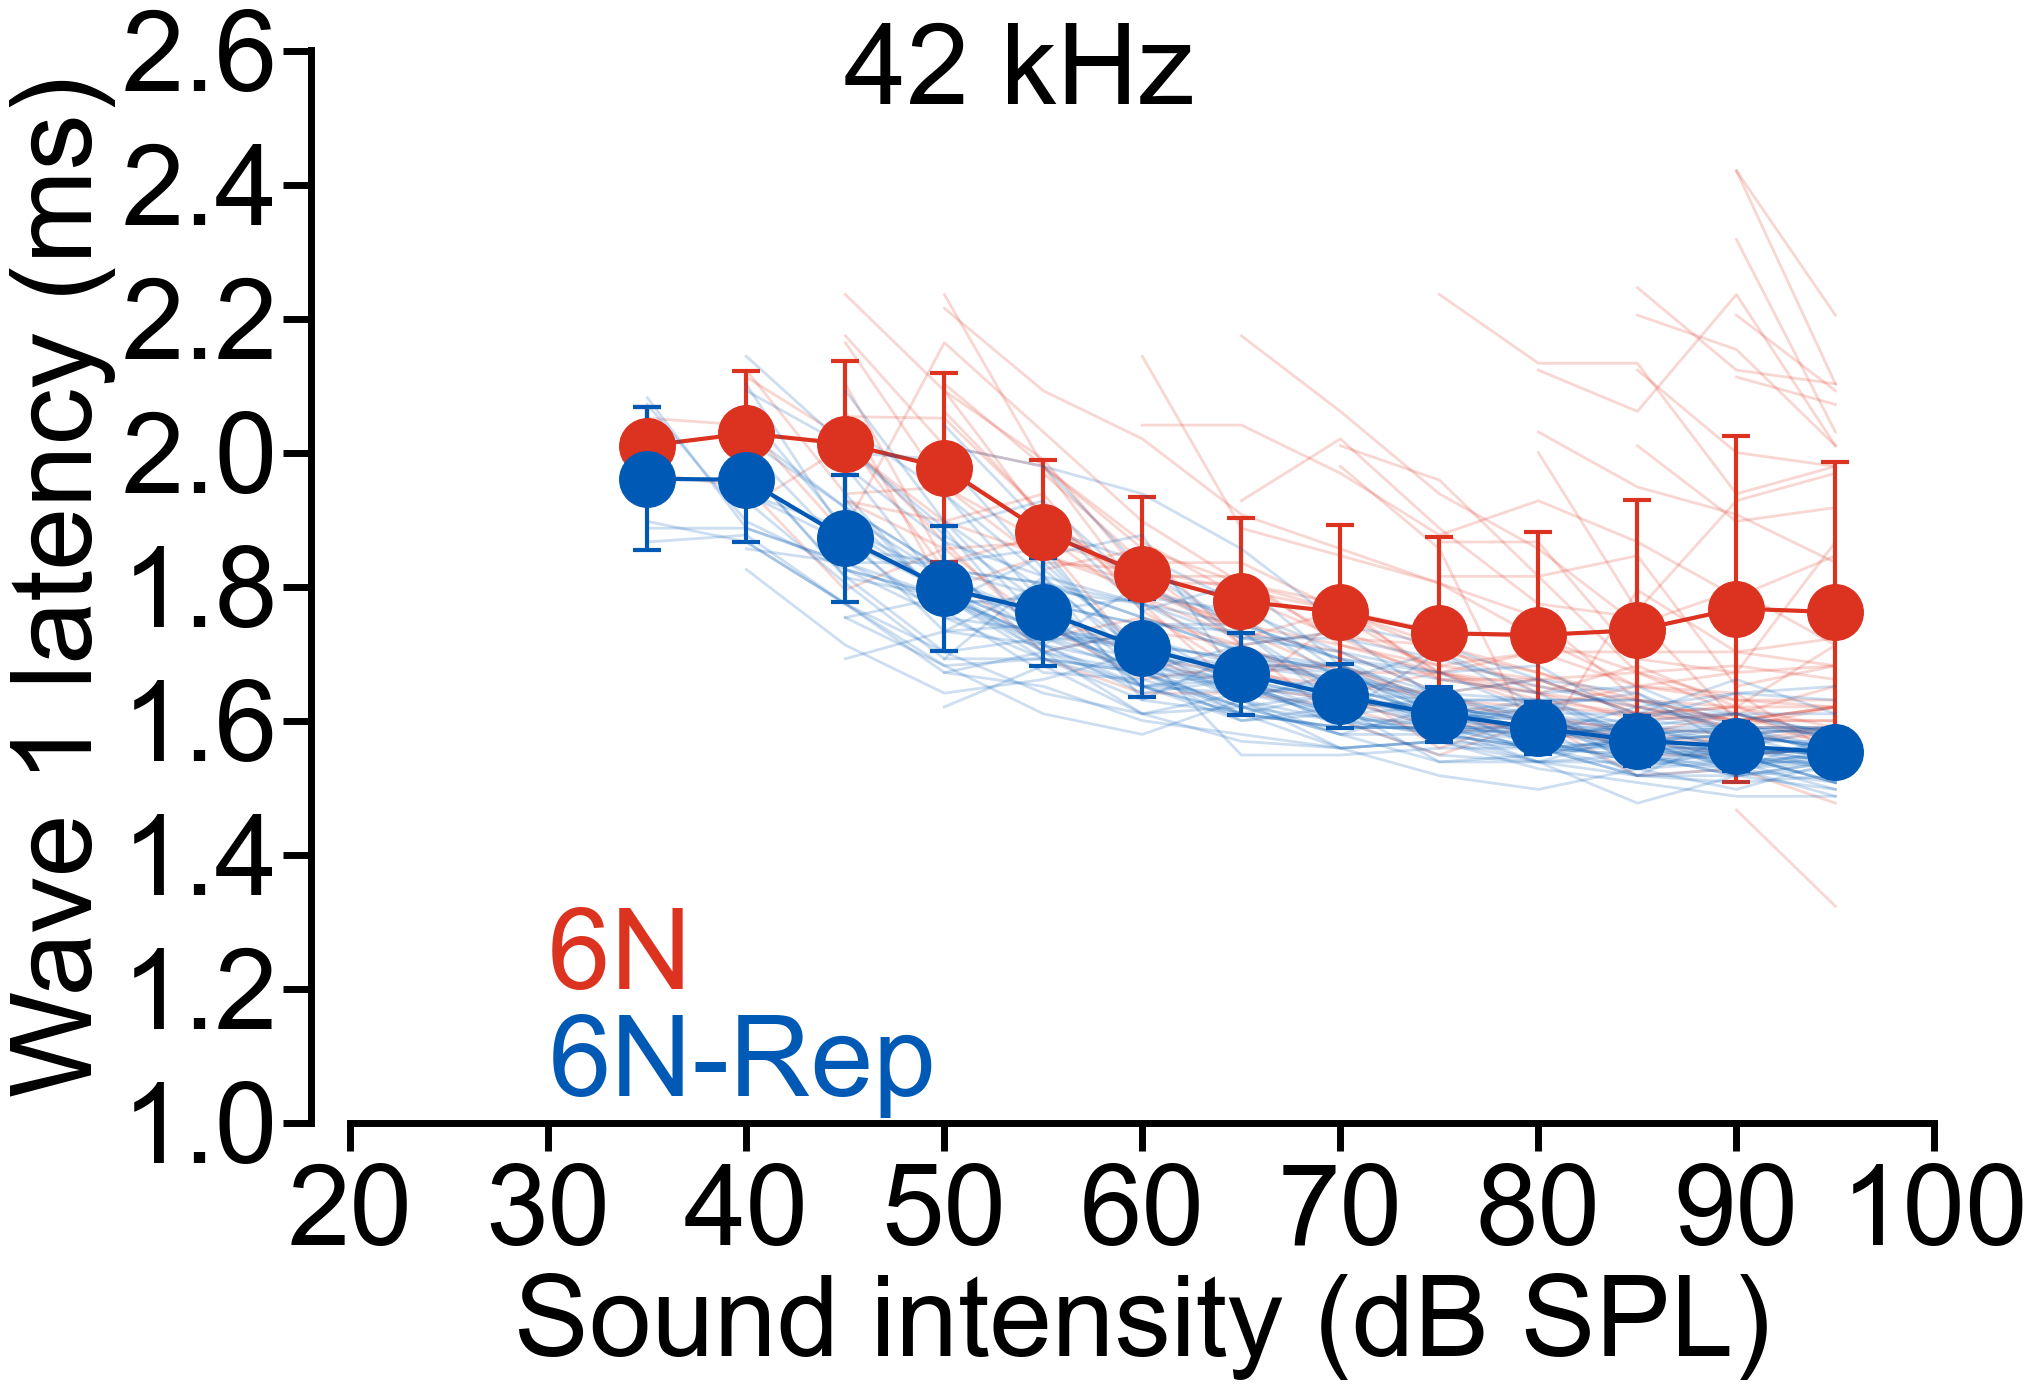

In [13]:
f = generateAmplitudeFigure(masterAll,freq=42000,age='1month')
f.suptitle('42 kHz',fontsize=fontSize)
savefig('./Panels/wave1amp42kHz.pdf',transparent=True,dpi=1200)

f = generateIntensityFigure(masterAll,freq=42000,age='1month')
f.suptitle('42 kHz',fontsize=fontSize)
savefig('./Panels/wave1lat42kHz.pdf',transparent=True,dpi=1200)

# Statistics

In [25]:
freq = 100
this_master = masterAll.query("Freq==@freq")
this_master[this_master['P1_x'].isna()]

df = this_master[['Wave1 latency','Intensity','Strain']]
#df['Intensity'] = df['Intensity'].astype('category')
df['Strain'] = df['Strain'].astype('category')
df = df.rename(columns={'Wave1 latency':'wil'}).dropna()
df = df.rename(columns={'Wave1 latency':'wil'}).dropna()

/var/folders/n2/bkzw0ff907zgpgprdz_rg_tr0000gn/T/ipykernel_99884/4040628747.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Strain'] = df['Strain'].astype('category')


In [26]:
df2 = df.groupby(['Strain','Intensity']).agg([mean])
df2.loc['6N'] -df2.loc['Repaired']

/var/folders/n2/bkzw0ff907zgpgprdz_rg_tr0000gn/T/ipykernel_99884/952951664.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df2 = df.groupby(['Strain','Intensity']).agg([mean])
/var/folders/n2/bkzw0ff907zgpgprdz_rg_tr0000gn/T/ipykernel_99884/952951664.py:1: FutureWarning: The provided callable <function mean at 0x1045d16c0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df2 = df.groupby(['Strain','Intensity']).agg([mean])


wil
               mean
Intensity          
30         0.036939
35         0.041826
40         0.036768
45         0.031020
50         0.034082
55         0.042902
60         0.050811
65         0.053576
70         0.055666
75         0.050317
80         0.042902
85         0.028893
90         0.022017
95         0.025846

In [27]:
(df2.loc['6N'] -df2.loc['Repaired'])/df2.loc['Repaired']*100

wil
               mean
Intensity          
30         2.084410
35         2.399359
40         2.154195
45         1.877889
50         2.136445
55         2.787954
60         3.406596
65         3.696986
70         3.944549
75         3.632026
80         3.144209
85         2.134718
90         1.640764
95         1.961089

In [28]:
err = df.groupby(['Strain','Intensity']).agg([std])
sqrt(err.loc[('6N',70)]**2 + err.loc[('Repaired',70)]**2)

/var/folders/n2/bkzw0ff907zgpgprdz_rg_tr0000gn/T/ipykernel_99884/4174395043.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  err = df.groupby(['Strain','Intensity']).agg([std])
/var/folders/n2/bkzw0ff907zgpgprdz_rg_tr0000gn/T/ipykernel_99884/4174395043.py:1: FutureWarning: The provided callable <function std at 0x1045d17e0> is currently using SeriesGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.
  err = df.groupby(['Strain','Intensity']).agg([std])


wil  std    0.076228
dtype: float64

In [29]:
%%R -i df
res <- aov(wil~Strain + Intensity,df)
summary(res)


              Df Sum Sq Mean Sq F value Pr(>F)    
Strain         1  0.449   0.449   115.1 <2e-16 ***
Intensity      1 28.315  28.315  7253.7 <2e-16 ***
Residuals   1381  5.391   0.004                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [30]:
this_master = masterAll.query("Freq==@freq")
this_master[this_master['P1_x'].isna()]

df = this_master[['Wave1 amp','Intensity','Strain']]
#df['Intensity'] = df['Intensity'].astype('category')
df['Strain'] = df['Strain'].astype('category')
df = df.rename(columns={'Wave1 amp':'wia'}).dropna()

/var/folders/n2/bkzw0ff907zgpgprdz_rg_tr0000gn/T/ipykernel_99884/1012062884.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Strain'] = df['Strain'].astype('category')


In [31]:
df2 = df.groupby(['Strain','Intensity']).agg([mean])
(df2.loc['6N'] -df2.loc['Repaired'])

/var/folders/n2/bkzw0ff907zgpgprdz_rg_tr0000gn/T/ipykernel_99884/3151545012.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df2 = df.groupby(['Strain','Intensity']).agg([mean])
/var/folders/n2/bkzw0ff907zgpgprdz_rg_tr0000gn/T/ipykernel_99884/3151545012.py:1: FutureWarning: The provided callable <function mean at 0x1045d16c0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df2 = df.groupby(['Strain','Intensity']).agg([mean])


wia
               mean
Intensity          
30        -0.048575
35        -0.228617
40        -0.359734
45        -0.381532
50        -0.462167
55        -0.611014
60        -0.835067
65        -0.955251
70        -1.045382
75        -1.135065
80        -1.194126
85        -1.330327
90        -1.540612
95        -1.671075

In [32]:
(df2.loc['6N'] -df2.loc['Repaired'])/df2.loc['Repaired']*100

wia
                mean
Intensity           
30         -8.301907
35        -18.597434
40        -15.118086
45        -10.729517
50        -10.085305
55        -10.945067
60        -12.737020
65        -12.941503
70        -13.178038
75        -13.688446
80        -14.048866
85        -15.293148
90        -17.168325
95        -18.392964

In [33]:
err = df.groupby(['Strain','Intensity']).agg([std])
sqrt(err.loc[('6N',95)]**2 + err.loc[('Repaired',95)]**2)

/var/folders/n2/bkzw0ff907zgpgprdz_rg_tr0000gn/T/ipykernel_99884/2517628322.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  err = df.groupby(['Strain','Intensity']).agg([std])
/var/folders/n2/bkzw0ff907zgpgprdz_rg_tr0000gn/T/ipykernel_99884/2517628322.py:1: FutureWarning: The provided callable <function std at 0x1045d17e0> is currently using SeriesGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.
  err = df.groupby(['Strain','Intensity']).agg([std])


wia  std    3.376538
dtype: float64

In [34]:
%%R -i df
res <- aov(wia~Strain * Intensity,df)
summary(res)


                   Df Sum Sq Mean Sq F value   Pr(>F)    
Strain              1    229     229   61.12 1.06e-14 ***
Intensity           1   7684    7684 2047.46  < 2e-16 ***
Strain:Intensity    1     82      82   21.89 3.17e-06 ***
Residuals        1380   5179       4                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
